In [75]:
#basic scientific libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#classification libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
#dimension reduction packages 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve


In [93]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [77]:
data = pd.read_csv('creditcard.csv')

In [4]:
print(f'Data Shape is {data.shape}')
data.head()

Data Shape is (284807, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

LETS UNDERSTAND THE DATA FIRST

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
data.describe


<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [10]:
data.columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

In [11]:
data.isnull().sum().sort_values(ascending=False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [12]:
def show_details(df) : 
    
    for col in df.columns : 
        print(f'for feature : {col}')
        print(f'Number of Nulls is   {df[col].isna().sum()}')
        print(f'Number of Unique values is   {len(df[col].unique())}')
        print(f'random Value {df[col][0]}')
        print(f'random Value {df[col][10]}')
        print(f'random Value {df[col][20]}')
        print('--------------------------')
show_details(data)

for feature : Time
Number of Nulls is   0
Number of Unique values is   124592
random Value 0.0
random Value 10.0
random Value 16.0
--------------------------
for feature : V1
Number of Nulls is   0
Number of Unique values is   275663
random Value -1.3598071336738
random Value 1.44904378114715
random Value 0.694884775607337
--------------------------
for feature : V2
Number of Nulls is   0
Number of Unique values is   275663
random Value -0.0727811733098497
random Value -1.17633882535966
random Value -1.36181910308009
--------------------------
for feature : V3
Number of Nulls is   0
Number of Unique values is   275663
random Value 2.53634673796914
random Value 0.913859832832795
random Value 1.02922103956032
--------------------------
for feature : V4
Number of Nulls is   0
Number of Unique values is   275663
random Value 1.37815522427443
random Value -1.37566665499943
random Value 0.834159299216716
--------------------------
for feature : V5
Number of Nulls is   0
Number of Unique valu

In [13]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [14]:
# number of classes present in the dataset
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

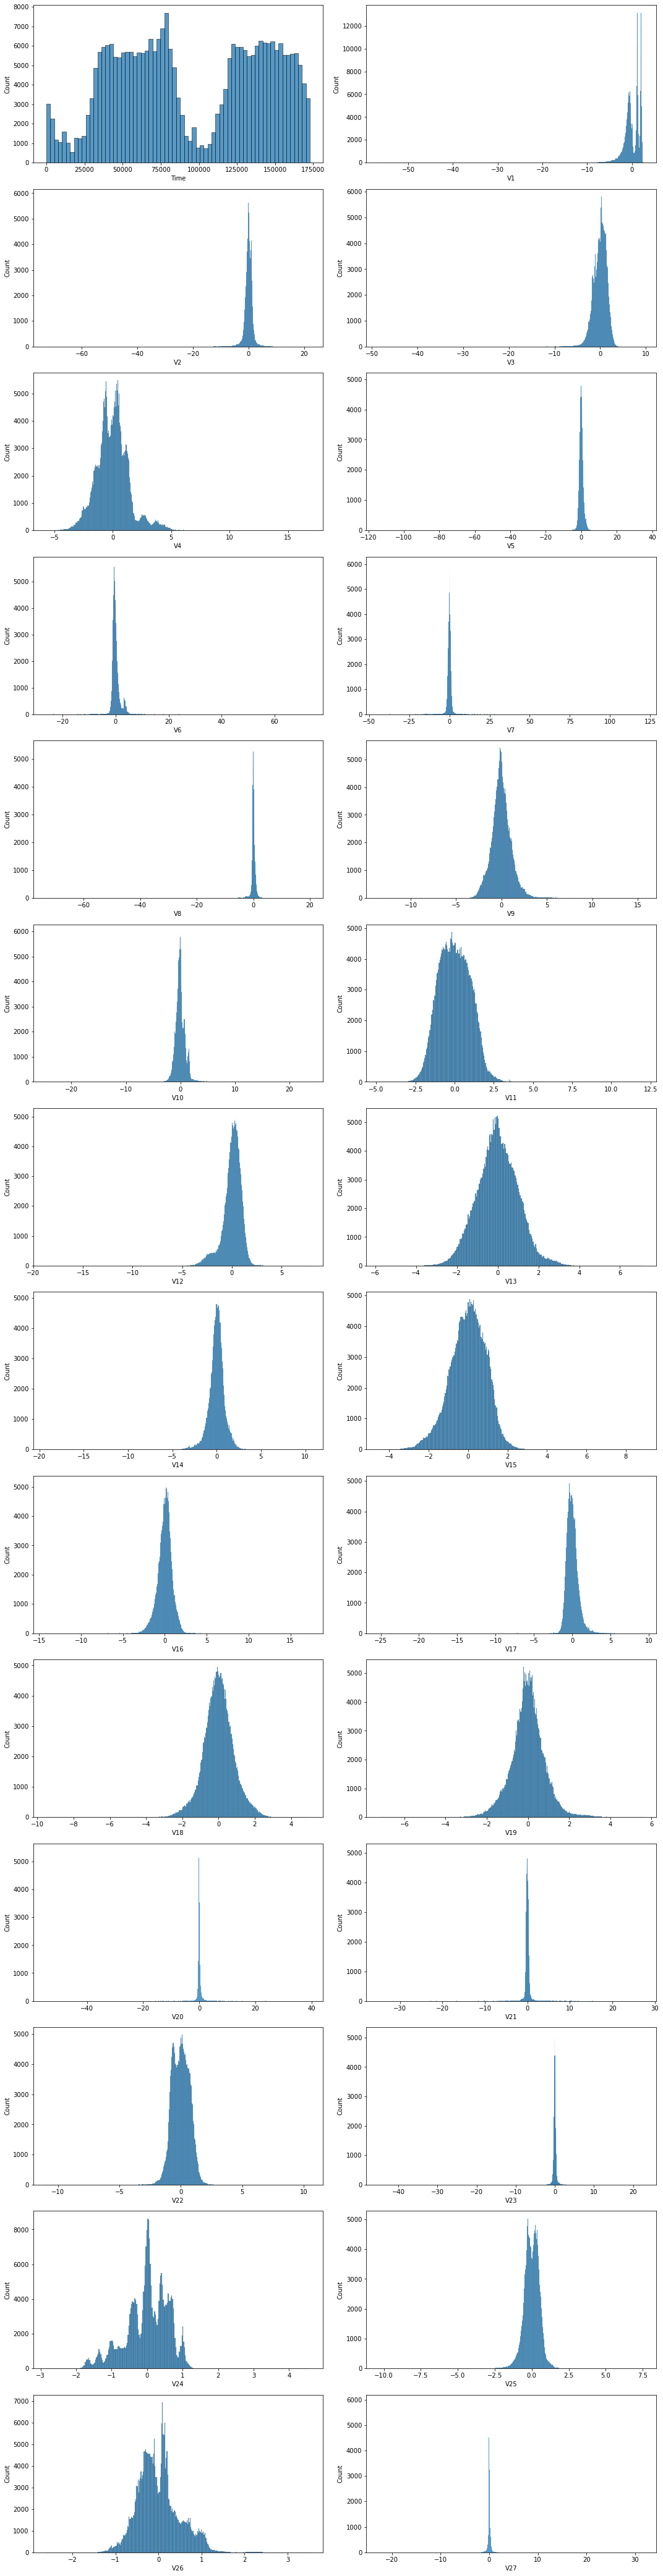

In [15]:
# hist plot
feature_col = data.drop(['Class','Amount'],axis=1).columns
f, ax = plt.subplots(ncols = 2, nrows = 14, figsize=(15,2*len(feature_col)))

for i, c in zip(ax.flatten(), feature_col):
    sns.histplot(data[c], ax = i)
f.tight_layout()

In [78]:
Fraud = data[data["Class"] == 1]
Normal = data[data["Class"] == 0]
print(Fraud.shape)
print(Normal.shape)

(492, 31)
(284315, 31)


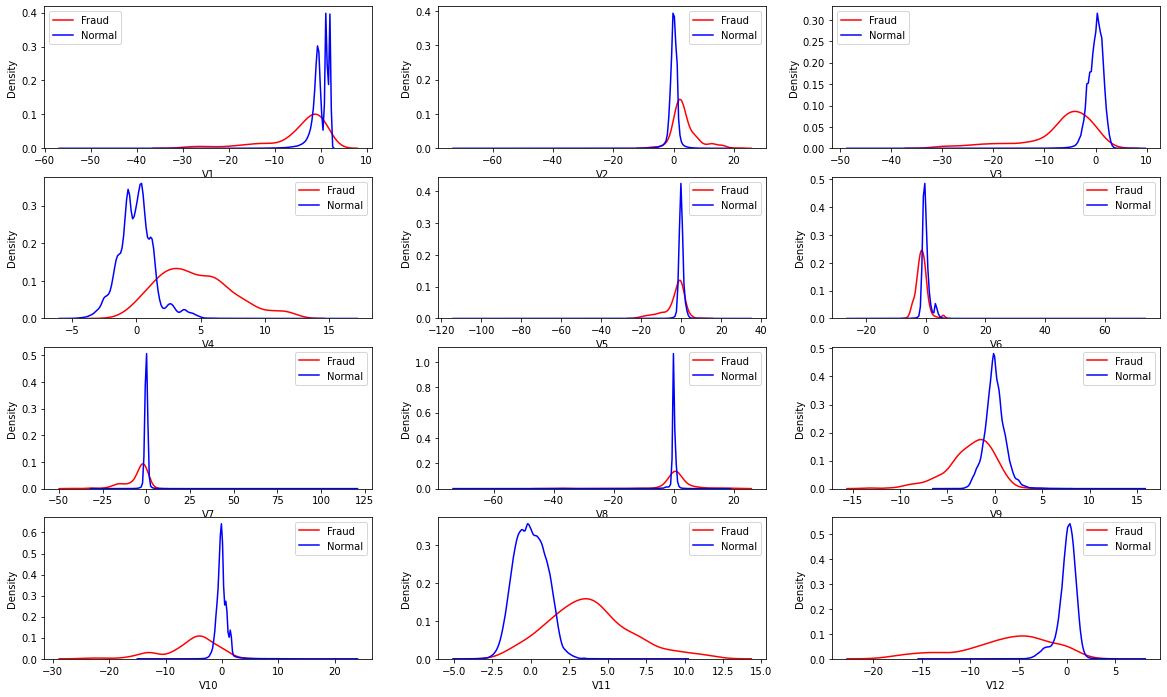

In [21]:
plt.figure(figsize = (20,12))
j=1;
for i in range(1,13):
    plt.subplot(4,3,j)
    sns.distplot(Fraud["V"+str(i)],hist = False,color = 'red',label = "Fraud")
    sns.distplot(Normal["V"+str(i)],hist = False, color = 'blue',label = "Normal")
    plt.legend(fontsize = "medium",loc = "best")
    j = j+1    

In [79]:
import copy 
data = data.drop(["Amount","Time"],axis = 1)
df = copy.deepcopy(data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
for i in range(1,29):
    df["V"+str(i)] = scaler.fit_transform(df["V"+str(i)].values.reshape(-1,1))

### OUTLIER DETECTION

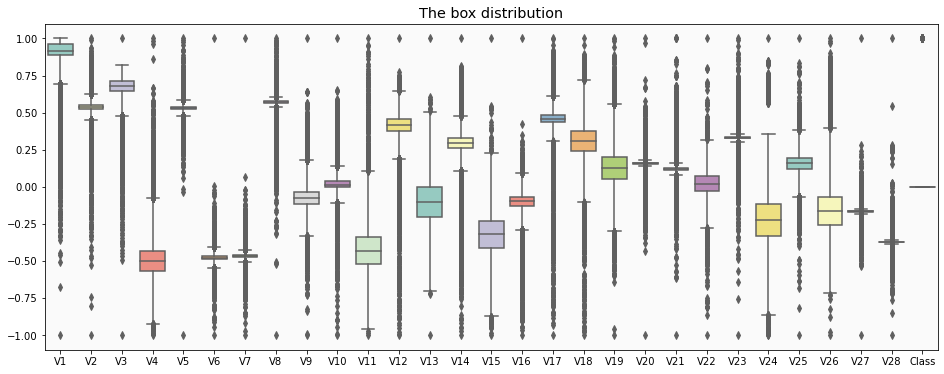

In [23]:
f, ax = plt.subplots(figsize=(16,6))
plt.style.use('ggplot') # Using ggplot2 style visuals 
ax.set_facecolor('#fafafa')
ax = sns.boxplot(data = df, palette = 'Set3',whis = 2.5)
plt.title("The box distribution")
plt.show()

In [80]:
collist = ["V"+ str(i) for i in range(1,29)]
df2 = df
df2fraud = df2[df2["Class"] == 1]
df2normal = df2[df2["Class"] == 0]
for column in collist:
    Q1 = np.percentile(df2normal[column],25)    # calculate the 25 percentile and 75 percentile 
    Q3 = np.percentile(df2normal[column],75)
    IQR = Q3-Q1                          # calculate the interval 
    threshold = IQR * 2.5                # set the threshold of 2.5 times of IQR
    lower, upper = Q1 - threshold, Q3 + threshold                  
    df2normal= df2normal[(df2normal[column]>lower) & (df2normal[column]<upper)]
df2 = pd.concat([df2normal,df2fraud])

from sklearn.utils import shuffle
df2 = shuffle(df2)    

In [81]:
df3 = data
df3fraud = df3[df3["Class"] == 1]
df3normal = df3[df3["Class"] == 0]
for column in collist:
    Q1 = np.percentile(df3normal[column],25)    # calculate the 25 percentile and 75 percentile 
    Q3 = np.percentile(df3normal[column],75)
    IQR = Q3-Q1                          # calculate the interval 
    threshold = IQR * 2.5                # set the threshold of 2.5 times of IQR
    lower, upper = Q1 - threshold, Q3 + threshold                  
    df3normal= df3normal[(df3normal[column]>lower) & (df3normal[column]<upper)]
df3 = pd.concat([df3normal,df3fraud])

from sklearn.utils import shuffle
df3 = shuffle(df3) 

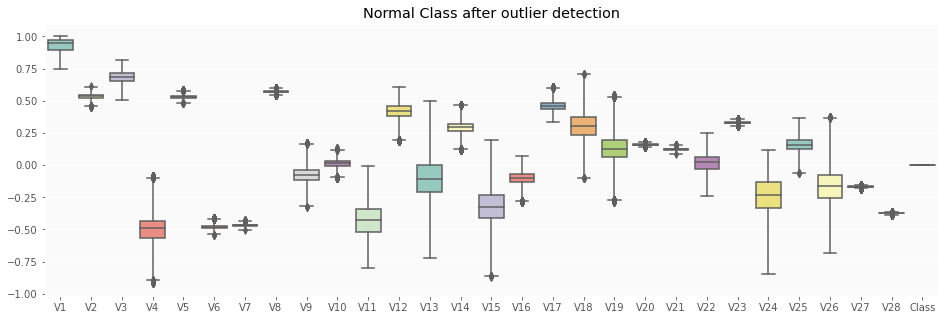

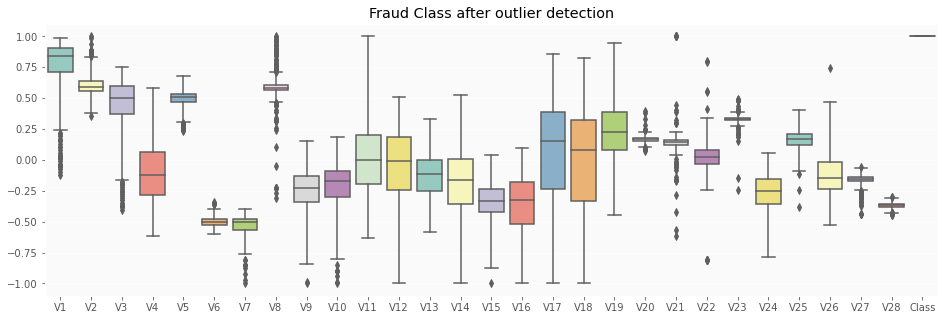

In [26]:
#plt.figure(figsize = (16,4))

#plt.subplot(1,2,1)
f, ax = plt.subplots(figsize=(16,5))
plt.style.use('ggplot') # Using ggplot2 style visuals 
ax.set_facecolor('#fafafa')
ax = sns.boxplot(data = df2normal, palette = 'Set3',whis = 2.5)
plt.title("Normal Class after outlier detection")
plt.show()

#plt.subplot(1,2,2)
f, ax = plt.subplots(figsize=(16,5))
plt.style.use('ggplot') # Using ggplot2 style visuals 
ax.set_facecolor('#fafafa')
ax = sns.boxplot(data = df2fraud, palette = 'Set3',whis = 2.5)
plt.title("Fraud Class after outlier detection")
plt.show()

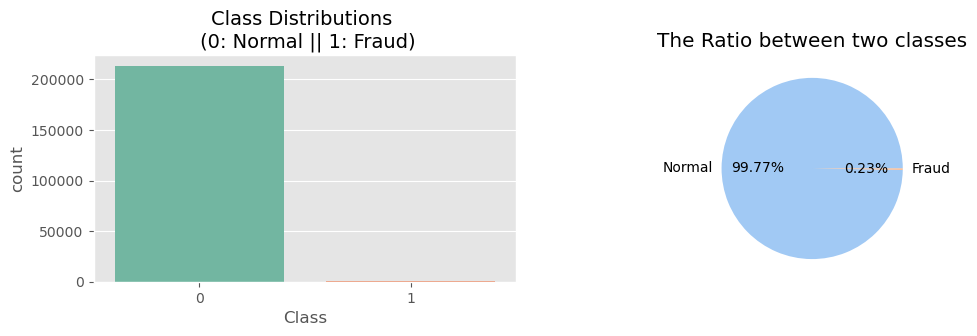

In [27]:
plt.figure(figsize = (12,3),dpi = 100)

plt.subplot(1,2,1)
sns.countplot('Class',data = df3, palette = "Set2")
plt.title('Class Distributions \n (0: Normal || 1: Fraud)', fontsize=14)

plt.subplot(1,2,2)
countdata = [df3[df3["Class"] == 0]["Class"].count(),df3[df3["Class"] == 1]["Class"].count()]
labelsdata = ["Normal","Fraud"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(countdata, labels = labelsdata, colors = colors,autopct='%.2f%%')
plt.title("The Ratio between two classes")
plt.show()

In [82]:
from sklearn.utils import resample

Normal = df3[df3["Class"] == 0]
Fraud = df3[df3["Class"] == 1]


## upsample minority
fraud_upsampled = resample(Fraud, replace=True,
                          n_samples=len(Normal), random_state=27)

## Combine majority and upsampled minority
RUSdata = pd.concat([Normal, fraud_upsampled])

## Check new class counts 
RUSdata.Class.value_counts()

0    213138
1    213138
Name: Class, dtype: int64

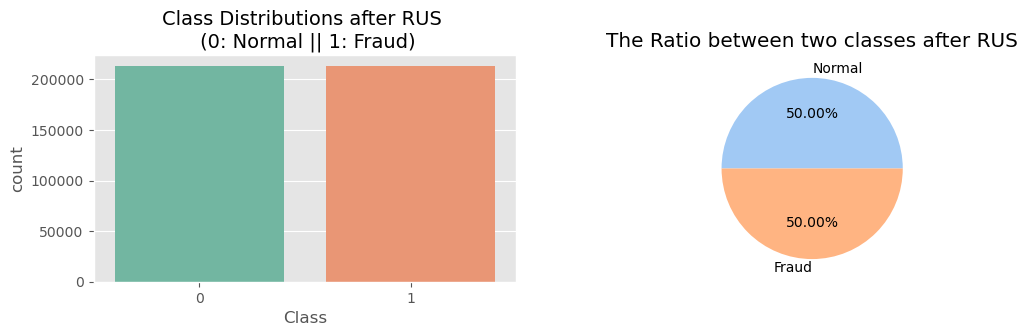

In [30]:
plt.figure(figsize = (12,3),dpi = 100)

plt.subplot(1,2,1)
sns.countplot('Class',data = RUSdata, palette = "Set2")
plt.title('Class Distributions after RUS \n (0: Normal || 1: Fraud)', fontsize=14)

plt.subplot(1,2,2)
countdata = [RUSdata[RUSdata["Class"] == 0]["Class"].count(),RUSdata[RUSdata["Class"] == 1]["Class"].count()]
labelsdata = ["Normal","Fraud"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(countdata, labels = labelsdata, colors = colors,autopct='%.2f%%')
plt.title("The Ratio between two classes after RUS")
plt.show()

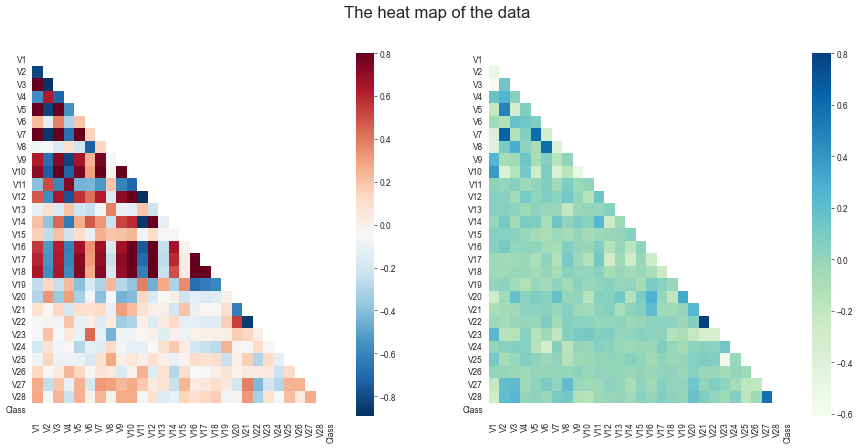

In [31]:
plt.figure(figsize = (18,8),dpi = 60)   # set the canvas 
corr = RUSdata.corr()                   # instantiate the correlation matrix
mask =  np.zeros_like(corr, dtype = np.bool)          # set the mask of the heap map 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("whitegrid")                            # set the seaborn style 
plt.title("The heat map of the data")
plt.subplot(1,2,1)
sns.heatmap((RUSdata.loc[RUSdata['Class'] ==1]).corr(), vmax = .8, cmap = "RdBu_r" , mask=mask);  # the fraud part 
plt.subplot(1,2,2)
sns.heatmap((RUSdata.loc[RUSdata['Class'] ==0]).corr(), vmax = .8,  cmap = "GnBu", mask=mask);    # the noraml part 
plt.suptitle("The heat map of the data",fontsize = 20)
plt.show()

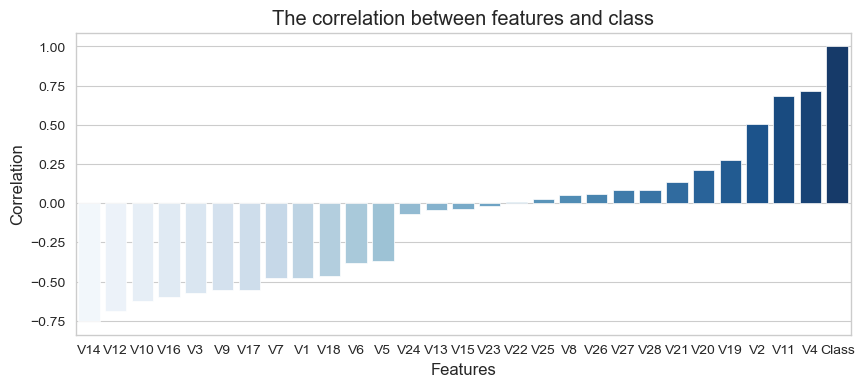

In [32]:
plt.figure(figsize = (10,4),dpi = 100)
c = pd.DataFrame(RUSdata.corr().sort_values('Class',ascending=True)['Class'])
sns.barplot(x = c.index, y = c.values.flatten(), palette = "Blues")
plt.title("The correlation between features and class")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.show()

In [ ]:
plt.figure(figsize = (20,30))
for i in range(1,29):
    sns.set_style("ticks")  
    plt.subplot(7,4,i)                  # create the subplot canvas 
                       
    data_select = "V" + str(i)             
    sns.kdeplot(x = data_select,data = RUSdata , hue = "Class",shade= True,alpha = 0.3 )  # plot the KDE plot in seaborn 
    plt.suptitle('The data distribution of different features',y = 0.9,fontsize = 20)

### DIMENSIONALITY REDUCTION

#### PCA

In [16]:
from sklearn.decomposition import PCA
features = ["V"+ str(i) for i in range(1,29)]   # create of list of V1-V28
Xpca = PCA(2).fit_transform(RUSdata[features].values)  # instanciate the pca 
Ypca = RUSdata["Class"]

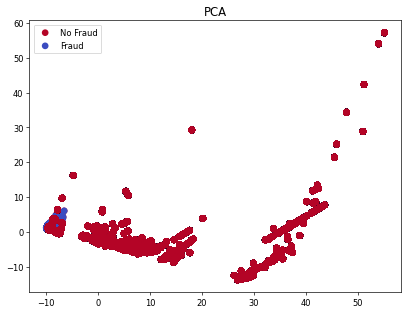

In [17]:
# draw a scatter plot of the PCA method
plt.figure(figsize = (8,6),dpi = 60)
plt.scatter(Xpca[:,0], Xpca[:,1], c = (Ypca==0),cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(Xpca[:,0], Xpca[:,1], c = (Ypca==1),cmap='coolwarm', label='Fraud', linewidths=2)
plt.legend()
plt.title('PCA', fontsize=14)
plt.show()

In [83]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [84]:
X = RUSdata.drop(['Class'],axis=1)
y = RUSdata['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
class_names=np.array(['0','1'])

In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model 1: Logistic Regression

In [19]:
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_pred = log_classifier.predict(X_test)
ytrain_pred=log_classifier.predict_proba(X_train)
ytest_pred=log_classifier.predict_proba(X_test)

#### EVALUATING THE MODEL

In [20]:
#1. Accuracy Score
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score( y_test, y_pred)))
#2. F1 Score
print('F1 score of the Logistic Regression model is {}'.format(f1_score( y_test, y_pred)))
#3. Precison
print('Precision of the Logistic Regression model is {}'.format(precision_score( y_test,y_pred)))
#4. Recall
print('Recall of the Logistic Regression model is {}'.format(recall_score( y_test,y_pred)))
#5. Train ROC_AUC
print('Logistic Train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,:-1])))
#6. Test ROC_AUC
print('Logistic Test roc-auc: {}'.format(roc_auc_score( y_test,ytest_pred[:,:-1])))

Accuracy score of the Logistic Regression model is 0.9639905225870522
F1 score of the Logistic Regression model is 0.9632396963383384
Precision of the Logistic Regression model is 0.9826541581158995
Recall of the Logistic Regression model is 0.9445775210182706
Logistic Train roc-auc: 0.008420451960399278
Logistic Test roc-auc: 0.008451812232372444


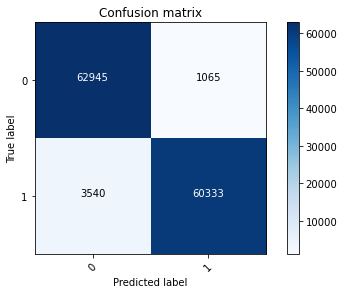

In [23]:
import itertools
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)

### Model 2: Decision Tree Classifier

In [24]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test )
ytrain_pred=clf.predict_proba(X_train )
ytest_pred=clf.predict_proba(X_test)

#### EVALUATING THE MODEL

In [25]:
#1. Accuracy Score
print('Accuracy score of the Decision Tree Classifier model is {}'.format(accuracy_score( y_test, y_pred)))
#2. F1 Score
print('F1 score of the Decision Tree Classifier model is {}'.format(f1_score( y_test, y_pred)))
#3. Precison
print('Precision of the Decision Tree Classifier model is {}'.format(precision_score( y_test,y_pred)))
#4. Recall
print('Recall of the Decision Tree Classifier model is {}'.format(recall_score( y_test,y_pred)))
#5. Train ROC_AUC
print('Decision Tree Classifier Train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,:-1])))
#6. Test ROC_AUC
print('Decision Tree Classifier Test roc-auc: {}'.format(roc_auc_score( y_test,ytest_pred[:,:-1])))

Accuracy score of the Decision Tree Classifier model is 0.9998123284564797
F1 score of the Decision Tree Classifier model is 0.9998121624794553
Precision of the Decision Tree Classifier model is 0.9996243955115264
Recall of the Decision Tree Classifier model is 1.0
Decision Tree Classifier Train roc-auc: 0.0
Decision Tree Classifier Test roc-auc: 0.00018747070770191998


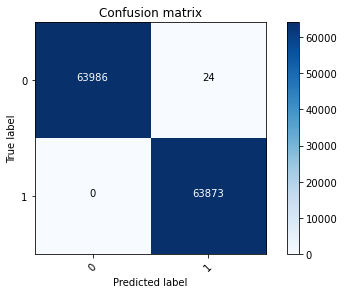

In [26]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)

### Model 3: Adaboost Classification

In [27]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
abc = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
ytrain_pred=abc.predict_proba(X_train)
ytest_pred=abc.predict_proba(X_test)

#### EVALUATING THE MODEL

In [28]:
#1. Accuracy Score
print('Accuracy score of the Adaboost Classifier model is {}'.format(accuracy_score( y_test, y_pred)))
#2. F1 Score
print('F1 score of the Adaboost Classifier model is {}'.format(f1_score( y_test, y_pred)))
#3. Precison
print('Precision of the Adaboost Classifier model is {}'.format(precision_score( y_test,y_pred)))
#4. Recall
print('Recall of the Adaboost Classifier model is {}'.format(recall_score( y_test,y_pred)))
#5. Train ROC_AUC
print('Adaboost Classifier Train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,:-1])))
#6. Test ROC_AUC
print('Adaboost Classifier Test roc-auc: {}'.format(roc_auc_score( y_test,ytest_pred[:,:-1])))

Accuracy score of the Adaboost Classifier model is 0.9833754291031647
F1 score of the Adaboost Classifier model is 0.9832432176805335
Precision of the Adaboost Classifier model is 0.9900477770194124
Recall of the Adaboost Classifier model is 0.9765315548040643
Adaboost Classifier Train roc-auc: 0.0005762268518814266
Adaboost Classifier Test roc-auc: 0.0006174720250764751


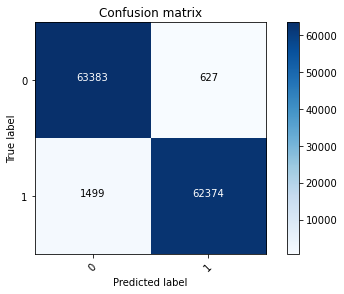

In [29]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)

### Model 4: Random Forest Classifier

In [30]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ytrain_pred=clf.predict_proba(X_train)
ytest_pred=clf.predict_proba(X_test)

#### EVALUATING THE MODEL

In [31]:
#1. Accuracy Score
print('Accuracy score of the Random Forestt Classifier model is {}'.format(accuracy_score( y_test, y_pred)))
#2. F1 Score
print('F1 score of the Random Forest Classifier model is {}'.format(f1_score( y_test, y_pred)))
#3. Precison
print('Precision of the Random Forest Classifier model is {}'.format(precision_score( y_test,y_pred)))
#4. Recall
print('Recall of the Random Forest Classifier model is {}'.format(recall_score( y_test,y_pred)))
#5. Train ROC_AUC
print('Random Forest Train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,:-1])))
#6. Test ROC_AUC
print('Random Forest Classifier Test roc-auc: {}'.format(roc_auc_score( y_test,ytest_pred[:,:-1])))

Accuracy score of the Random Forestt Classifier model is 0.9998123284564797
F1 score of the Random Forest Classifier model is 0.9998121624794553
Precision of the Random Forest Classifier model is 0.9996243955115264
Recall of the Random Forest Classifier model is 1.0
Random Forest Train roc-auc: 0.0
Random Forest Classifier Test roc-auc: 0.00018747070770191998


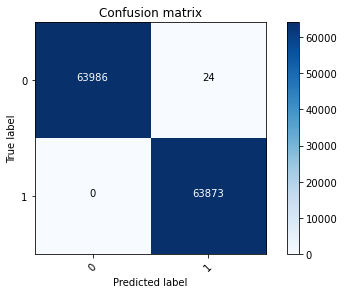

In [32]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,class_names)

In [35]:
from sklearn import svm
classifier = svm.SVC(kernel='linear') 
# We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [36]:
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(kernel='linear')

In [37]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.

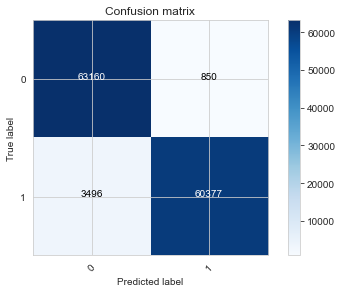

In [43]:
import itertools
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [21]:
X = RUSdata.drop(['Class'],axis=1)
y = RUSdata['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []
models.append(('GBC', GradientBoostingClassifier(random_state = 42)))
models.append(('ADA', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(random_state = 42)))
models.append(('LR', LogisticRegression(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))

name_list = []
accuracy_scores = []
accuracy_scores_train = []
recall_scores = []
recall_scores_train = []
f1_scores = []
f1_scores_train = []



for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
    recall_scores.append(recall_score(y_test,y_pred))
    recall_scores_train.append(recall_score(y_train,y_pred_train))
    f1_scores.append(f1_score(y_test,y_pred))
    f1_scores_train.append(f1_score(y_train,y_pred_train))
    name_list.append(name)
    result = {"Model":name_list,"Accuracy Score Test":accuracy_scores, "Accuracy Score Train": accuracy_scores_train,\
              "Recall Score Test":recall_scores, "Recall Score Train": recall_scores_train ,\
              "F1 Score Test" :f1_scores,"F1 Score train" : f1_scores_train}    
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score Test",ascending=False)
dataframe.reset_index(drop=True)

Model  Accuracy Score Test  Accuracy Score Train  Recall Score Test  \
0    RF             1.000000              1.000000           1.000000   
1   GBC             0.996825              0.997027           0.997965   
2   SVM             0.991907              0.991789           0.990231   
3   ADA             0.981796              0.981658           0.972665   
4    LR             0.964366              0.963659           0.945141   

   Recall Score Train  F1 Score Test  F1 Score train  
0            1.000000       1.000000        1.000000  
1            0.997937       0.996825        0.997031  
2            0.989777       0.991884        0.991777  
3            0.971842       0.981609        0.981485  
4            0.943275       0.963630        0.962919

In [ ]:
ALL THE ALGORITHMS WORK GREAT BUT RANDOM FOREST HAS ABOVE HAND AMONG ALL OF THEM.

# MCMC

In [85]:
import theano

In [106]:
import pymc3 as pm

In [15]:
X.head(50)

V1        V2        V3        V4        V5        V6        V7  \
46217   1.335053  0.331464 -2.057763 -0.346175  2.583234  2.854102 -0.187547   
217137  1.960360 -0.375884 -0.378700  0.279112 -0.541640 -0.256596 -0.579307   
54640  -0.921613  1.003375  1.044529 -0.756765 -0.214397 -0.470203  0.208064   
9784   -0.242108  0.438896  1.910053 -0.535354  0.076592  0.347620  0.317617   
254953  1.732166 -0.772691 -1.441021 -0.076128  0.508067  1.081426 -0.224584   
218363 -0.733645  0.179473  1.016967 -0.982024  1.060675  2.146309  0.466122   
227258  1.938952 -0.866630 -0.317440  0.555522 -0.814279  0.444863 -1.034566   
149981  1.815155 -0.128141 -1.733550  1.480331  0.553518 -0.538023  0.504346   
164908  2.051789 -0.072773 -1.163762  0.447091 -0.063817 -1.153162  0.245926   
187511 -0.780203  1.830051  0.325025  4.148316  1.116738  0.934619  0.550104   
262147  2.024600 -0.135555 -1.296242  0.225557  0.139963 -0.638574  0.101895   
137722  0.956917  0.036499  0.813606  2.784274 -0.563334 -0.179670  0.013995   
105721 -1.126495  0.215840  1.389023  0.253470  0.616742  0.374974  1.048017   
277238 -0.385555  1.323349 -0.714543 -0.189545  0.600127 -1.336233  1.146747   
43045  -2.260656 -0.415801  1.810160 -1.324598 -1.193516 -0.164160 -1.730148   
236504  2.085595  0.152531 -1.769018  0.381249  0.489955 -0.792067  0.181506   
193500  1.941252 -0.364879 -0.573095  0.329598 -0.318954 -0.313494 -0.312450   
18399   1.052066 -0.221035  0.214187  0.237832  0.299898  1.492134 -0.574361   
92682  -0.918797  0.648150  1.689202 -0.415127 -0.119096 -0.224282  0.547543   
53770   1.032926 -0.058869 -0.315269  1.210209  0.337745  0.139701  0.389406   
99130  -0.912886  1.196421  0.839055  0.588405  0.659452 -0.568150  0.687011   
135078  1.158424  0.087118  0.272855  1.205079 -0.026206  0.302304 -0.131135   
137778  0.769470 -0.622395  1.054928  1.429154 -1.082112  0.128229 -0.430969   
95092  -0.772491  0.175948  2.509504  1.312254 -0.028749 -0.170457 -0.442987   
153341 -1.635001 -1.071499  3.011262  1.932894 -1.394251  1.479867  0.148021   
180779  1.100822 -1.751982 -1.179405 -0.142146 -1.283041 -1.036085  0.034555   
96805  -0.540595  0.826453  1.140816  0.072024 -0.024853 -0.377536  0.935324   
148381  1.966826 -0.304963 -0.196222  0.510318 -0.660193 -0.500724 -0.508895   
208945 -0.080337  0.938746 -1.272352 -0.193243  0.408607 -0.755427  0.586406   
256903 -0.657531  1.399739 -0.425651 -0.287011  0.529657 -1.097068  0.690548   
212949  1.927181 -0.564204  0.057601  0.176445 -0.984375 -0.264874 -0.896935   
88588   1.234865 -0.626249  0.553079 -0.295193 -1.008043 -0.228296 -0.657228   
278062  1.876852 -0.588538 -1.142854  0.642405 -0.080020 -0.068640 -0.057744   
163017  2.205815 -1.563266 -0.723595 -1.653590 -1.347320 -0.117419 -1.441162   
139699 -0.448665  0.946834  1.771330 -0.084789  0.071451 -0.673610  0.685970   
271753  1.831464 -1.933512 -1.633569 -1.274597 -1.206112 -1.200281 -0.220556   
55412   1.250222  0.471560  0.328291  1.103655 -0.148114 -0.936948  0.306561   
66986   1.092171 -0.688309  0.944351 -0.034207 -1.038156  0.482510 -0.977836   
72982  -0.656939 -0.147285  0.865148 -1.887367  0.786797  1.182510 -0.494467   
150385 -0.746179  2.155463  1.207286  4.127123  1.063735  1.894353  0.172995   
11019   0.898614  0.033896 -0.083297  1.256326  0.554091  0.702342  0.155668   
105460 -1.063437  1.673212  0.614740  0.871099 -0.627700 -0.522707  0.247051   
252482 -0.269845  0.596301  0.091115 -2.094821  0.674633 -1.407241  1.013555   
117664 -0.265015  1.022174  1.203759  0.562654  0.806509  0.254223  0.838819   
248714  1.957564 -0.480766  0.049169  0.456831 -0.988025 -0.427195 -0.830261   
219912  2.018870  0.442409 -2.510490  0.588526  0.680478 -1.240870  0.177978   
261137  1.893925 -0.767897 -1.831995  0.625164 -0.053268 -0.570795  0.205848   
49121   1.073941 -1.581131  0.628401 -1.225273 -1.646884 -0.104079 -0.990126   
255366  2.006245 -0.001277 -1.646372  0.706908  0.148897 -0.938309  0.088547   
244900 -1.3762

In [87]:
V2=X['V2']

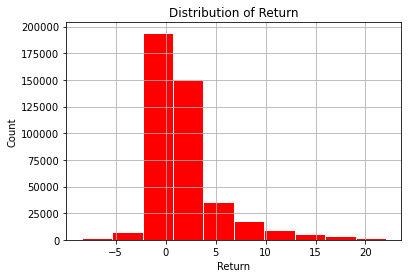

In [16]:
V2.hist(color = "red", edgecolor = "white")
plt.xlabel('Return'); plt.ylabel('Count');
plt.title('Distribution of Return');

In [29]:
with pm.Model() as model_n:
    #Prior
    mu = pm.Uniform("mu", lower=-10, upper=10, testval=0)
    sigma = pm.Uniform("sigma", lower=0, upper=6, testval=0.0001)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu, sd=sigma, observed = V2.values)
    
    #Posterior
    
    step  = pm.Metropolis()
    trace = pm.sample(1000, chains=3, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    btrace = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 20 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<AxesSubplot:title={'center':'mu\n0'}>,
        <AxesSubplot:title={'center':'mu\n1'}>,
        <AxesSubplot:title={'center':'mu\n2'}>],
       [<AxesSubplot:title={'center':'sigma\n0'}>,
        <AxesSubplot:title={'center':'sigma\n1'}>,
        <AxesSubplot:title={'center':'sigma\n2'}>]], dtype=object)

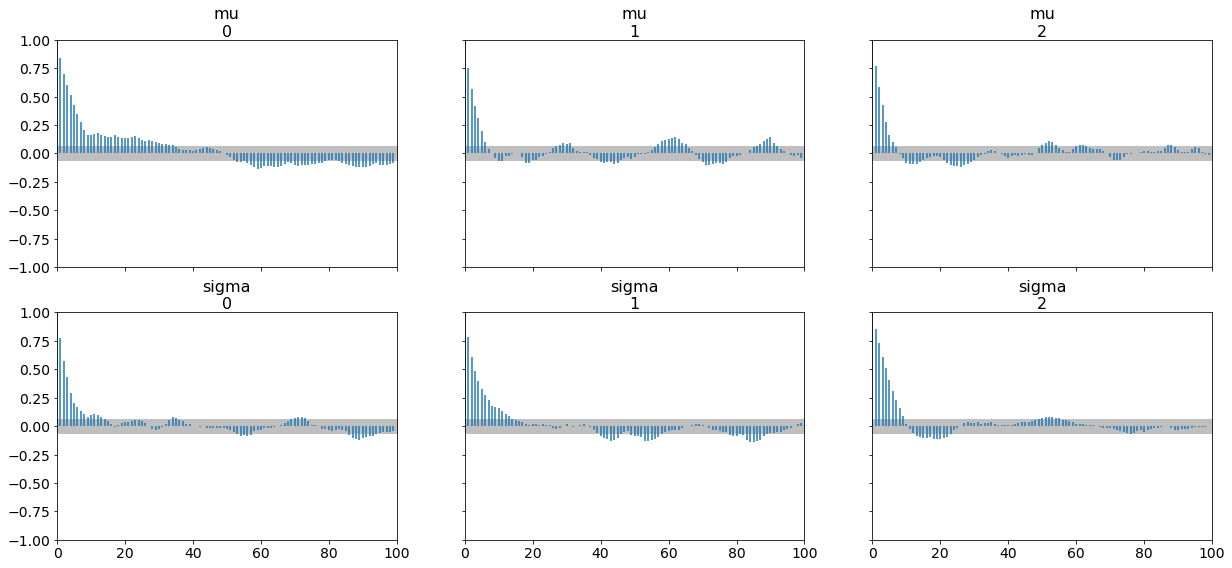

In [30]:
pm.autocorrplot(btrace)

In [11]:
import arviz as az

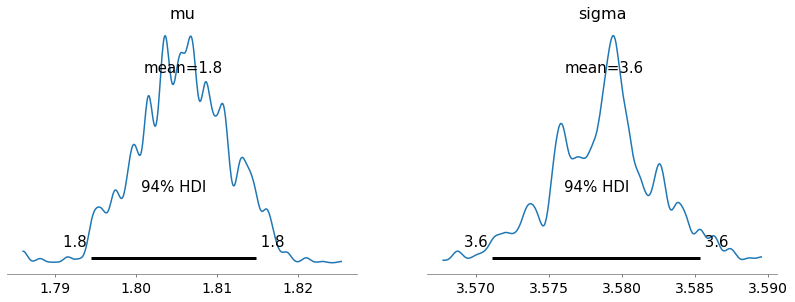

In [31]:
import arviz as az
az.plot_posterior(btrace);

In [33]:
pm.summary(btrace)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     1.806  0.006   1.795    1.815        0.0      0.0     358.0     257.0   
sigma  3.579  0.004   3.571    3.585        0.0      0.0     354.0     277.0   

       r_hat  
mu      1.01  
sigma   1.04

In [88]:
with pm.Model() as model_g:
    #Prior
    

    mu1 = pm.Uniform("mu1", lower=-10, upper=10, testval=0)
    sigma1 = pm.HalfNormal("sigma1", sigma =1.5)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu1, sd=sigma1, observed = V2.values)
    
    #Posterior
    
    step  = pm.NUTS()
    trace = pm.sample(1000, chains=3, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    btrace_nutss = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma1, mu1]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 47 seconds.


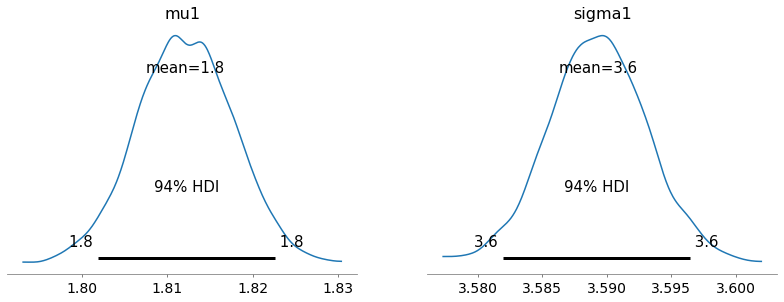

In [24]:
with model_g:
    az.plot_posterior(btrace_nutss);

In [89]:
pm.summary(btrace_nutss)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu1     1.802  0.006   1.792    1.812        0.0      0.0    2689.0    1930.0   
sigma1  3.567  0.004   3.560    3.574        0.0      0.0    2635.0    2133.0   

        r_hat  
mu1       1.0  
sigma1    1.0

In [31]:
mu_obs=V2.mean()
mu_obs

1.8119188441136518

In [49]:
#The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.05,(1,))[0]]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [50]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,V2,acceptance)

In [52]:
print(accepted.shape)

(4991, 2)


In [53]:
print(rejected.shape)

(45009, 2)


(4991, 2)

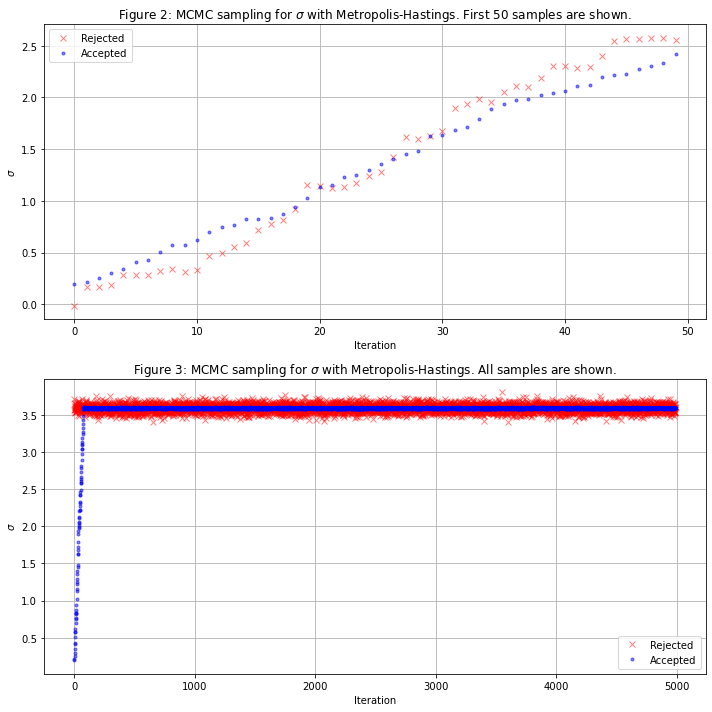

In [54]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

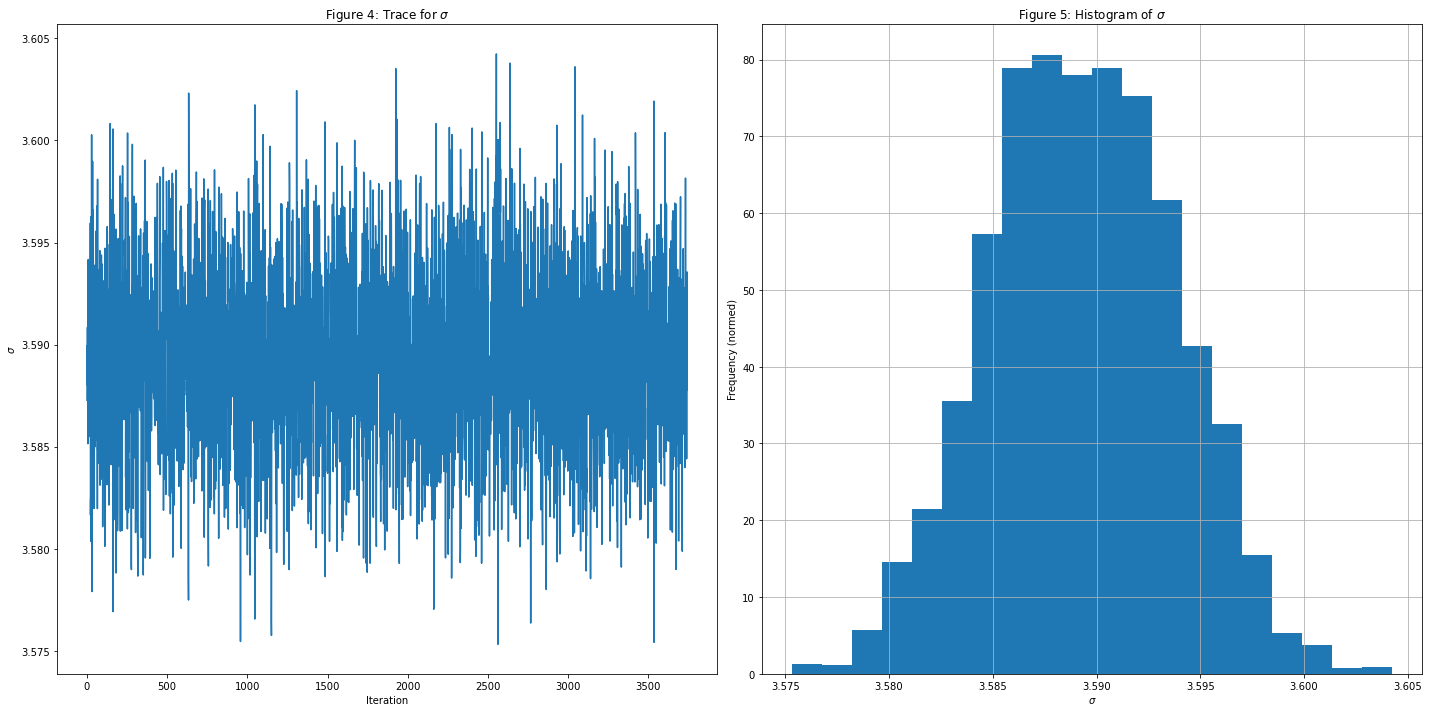

In [55]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram of $\sigma$")
fig.tight_layout()


ax.grid("off")

1.811918844113652 3.589306380884341


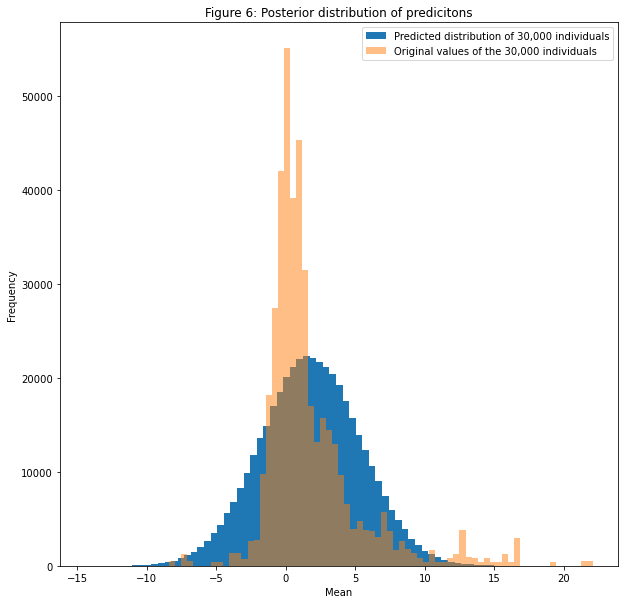

In [56]:
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(V2.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=70 ,label="Predicted distribution of 30,000 individuals")
ax.hist( V2,bins=70 ,alpha=0.5, label="Original values of the 30,000 individuals")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Figure 6: Posterior distribution of predicitons")
ax.legend()

In [79]:
V13=X['V13']

In [100]:
mu=V13.mean()

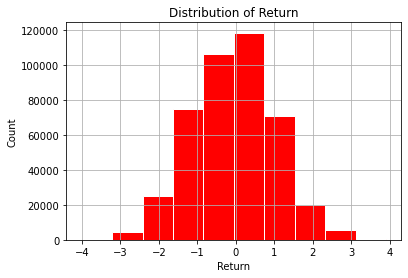

In [80]:
V13.hist(color = "red", edgecolor = "white")
plt.xlabel('Return'); plt.ylabel('Count');
plt.title('Distribution of Return');

In [81]:
V13.mean()

-0.05984427432923236

In [82]:
with pm.Model() as model_z:
    #Prior
    

    mu1 = pm.Normal("mu1", mu=0)
    sigma1 = pm.HalfNormal("sigma1", sigma =1.5)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu1, sd=sigma1, observed = V13.values)
    
    #Posterior
    
    step  = pm.Metropolis()
    trace = pm.sample(1000, chains=3, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    btrace = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (3 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma1]
>Metropolis: [mu1]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 21 seconds.
The number of effective samples is smaller than 10% for some parameters.


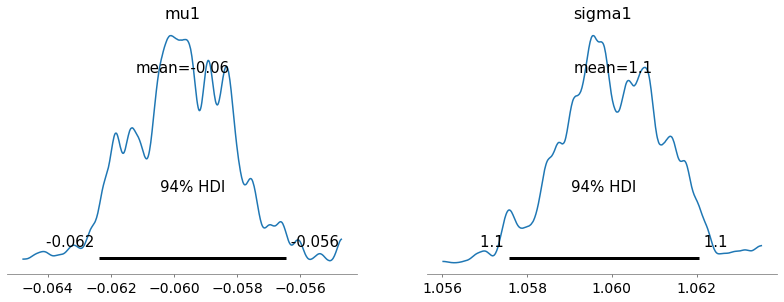

In [83]:
with model_z:
    az.plot_posterior(btrace);

In [87]:
with pm.Model() as model_z:
    #Prior
    

    mu1 = pm.Normal("mu1", mu=1)
    sigma1 = pm.HalfNormal("sigma1", sigma =1.5)
    
    #Likelihood
    likelihood = pm.Normal("likelihood", mu=mu1, sd=sigma1, observed = V13.values)
    
    #Posterior
    
    step  = pm.NUTS()
    trace = pm.sample(1000, chains=3, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    btrace = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma1, mu1]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 43 seconds.


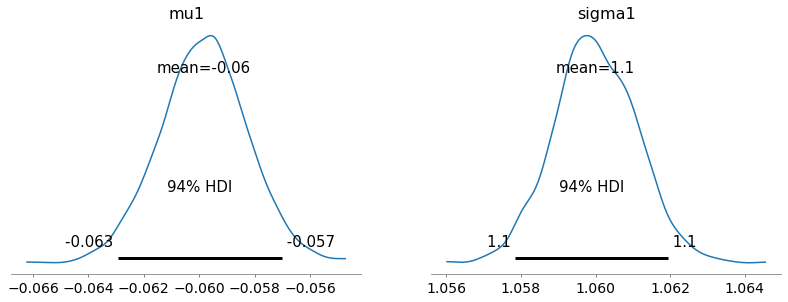

In [88]:
with model_z:
    az.plot_posterior(btrace);

In [101]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu,0.1], 50000,V13,acceptance)

In [102]:
print(accepted.shape)

(1438, 2)


In [103]:
print(rejected.shape)

(48562, 2)


(1438, 2)

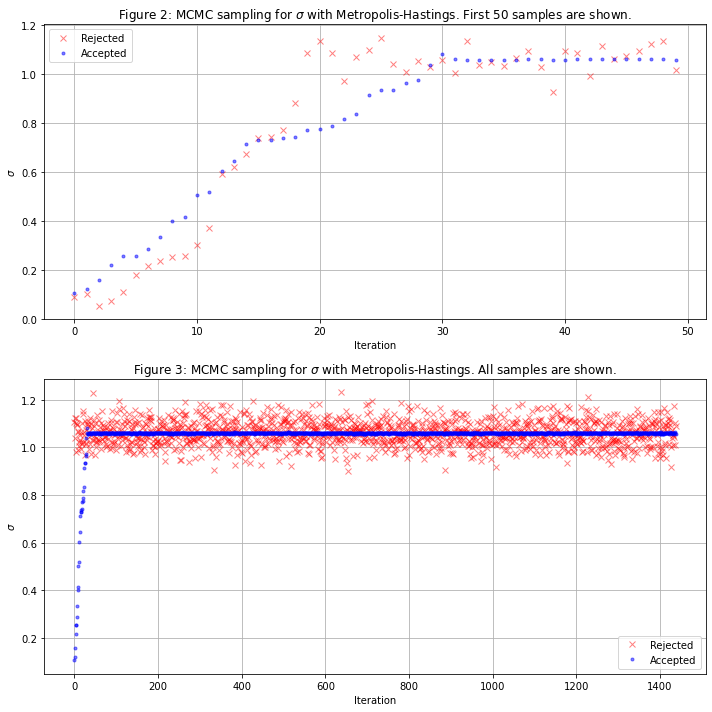

In [104]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

-0.05984427432923234 1.0506338599230873


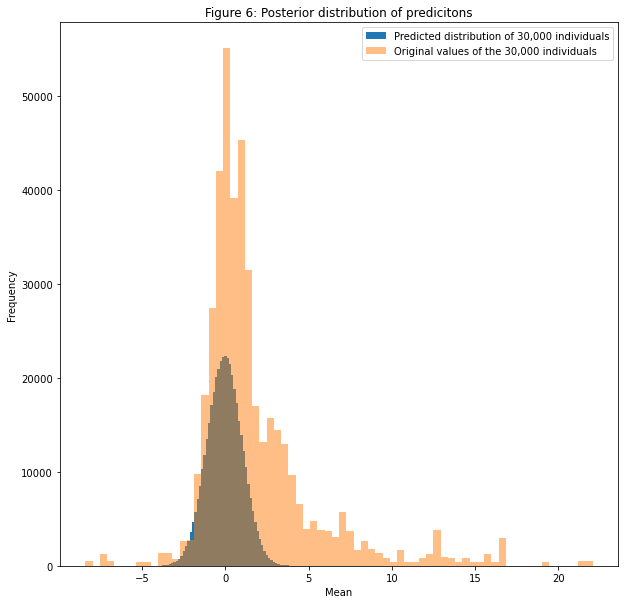

In [105]:
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(V13.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=70 ,label="Predicted distribution of 30,000 individuals")
ax.hist( V2,bins=70 ,alpha=0.5, label="Original values of the 30,000 individuals")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Figure 6: Posterior distribution of predicitons")
ax.legend()

In [15]:
y_simple = y
x_n = 'AcceptedCmp5' 
x_0 = X['V2'].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_simple:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    step  = pm.NUTS()
    trace = pm.sample(1000, chains=2, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    b_trace_sim = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 228 seconds.


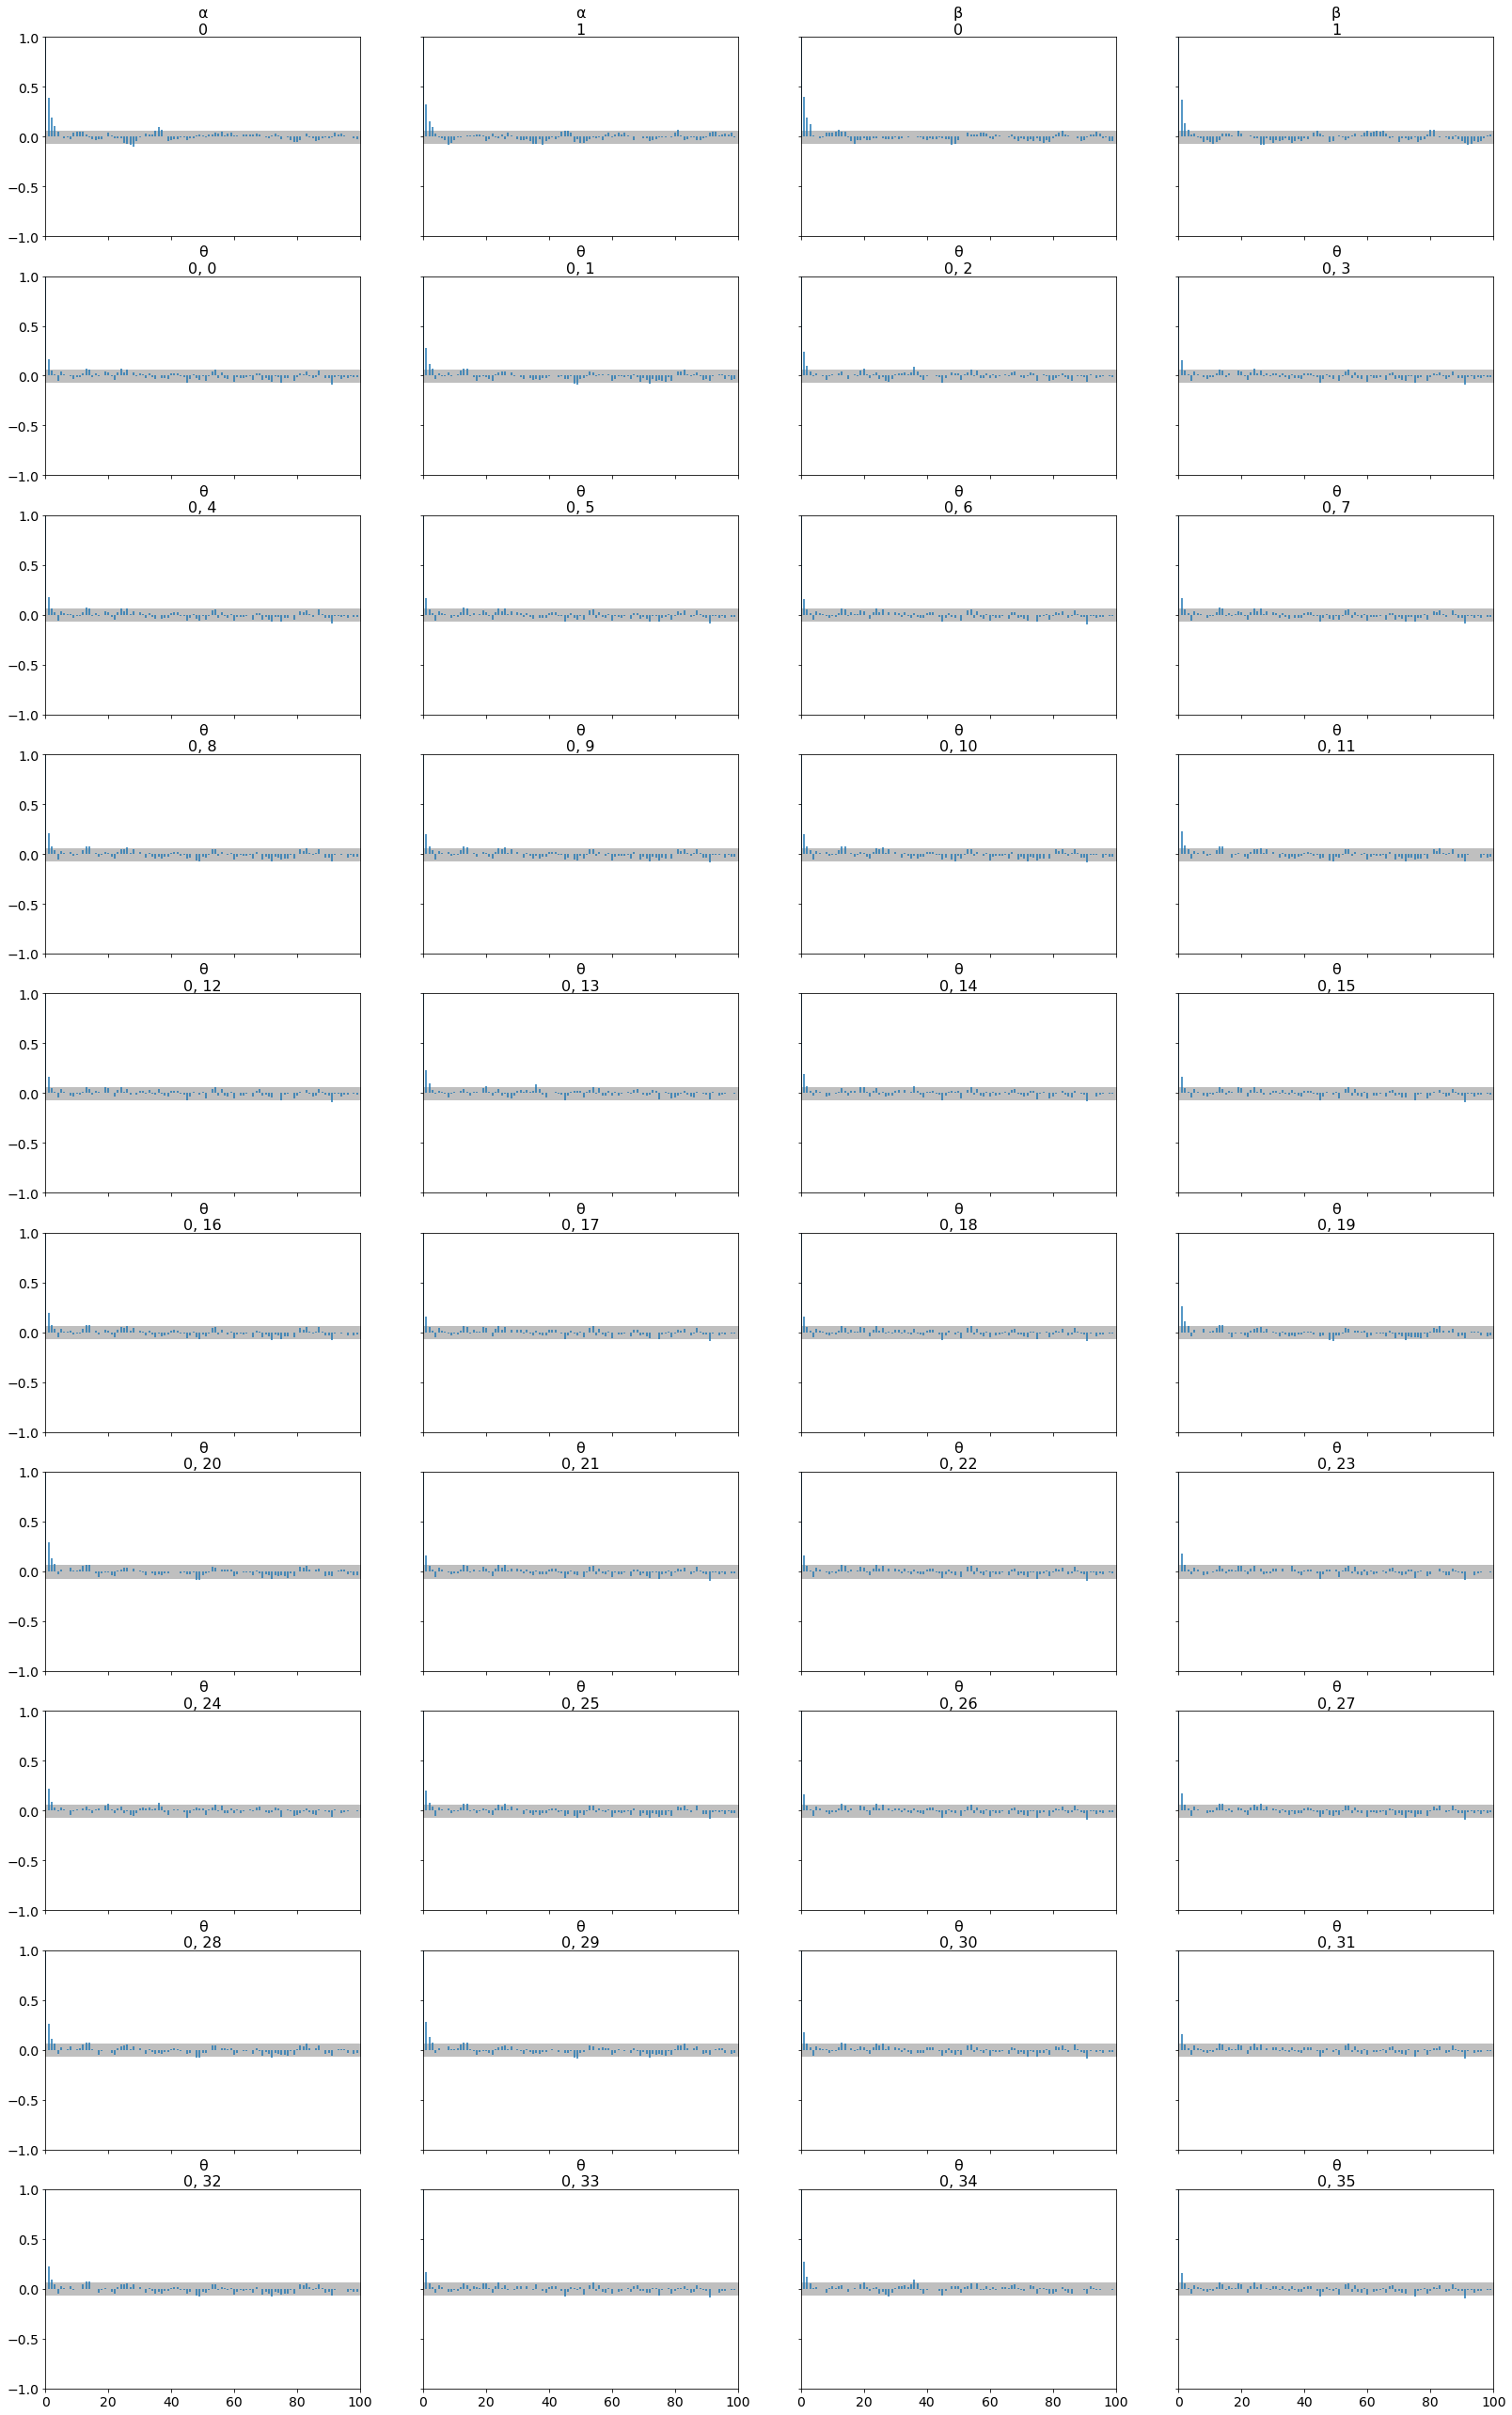

In [16]:
with model_simple:
    pm.autocorrplot(b_trace_sim)

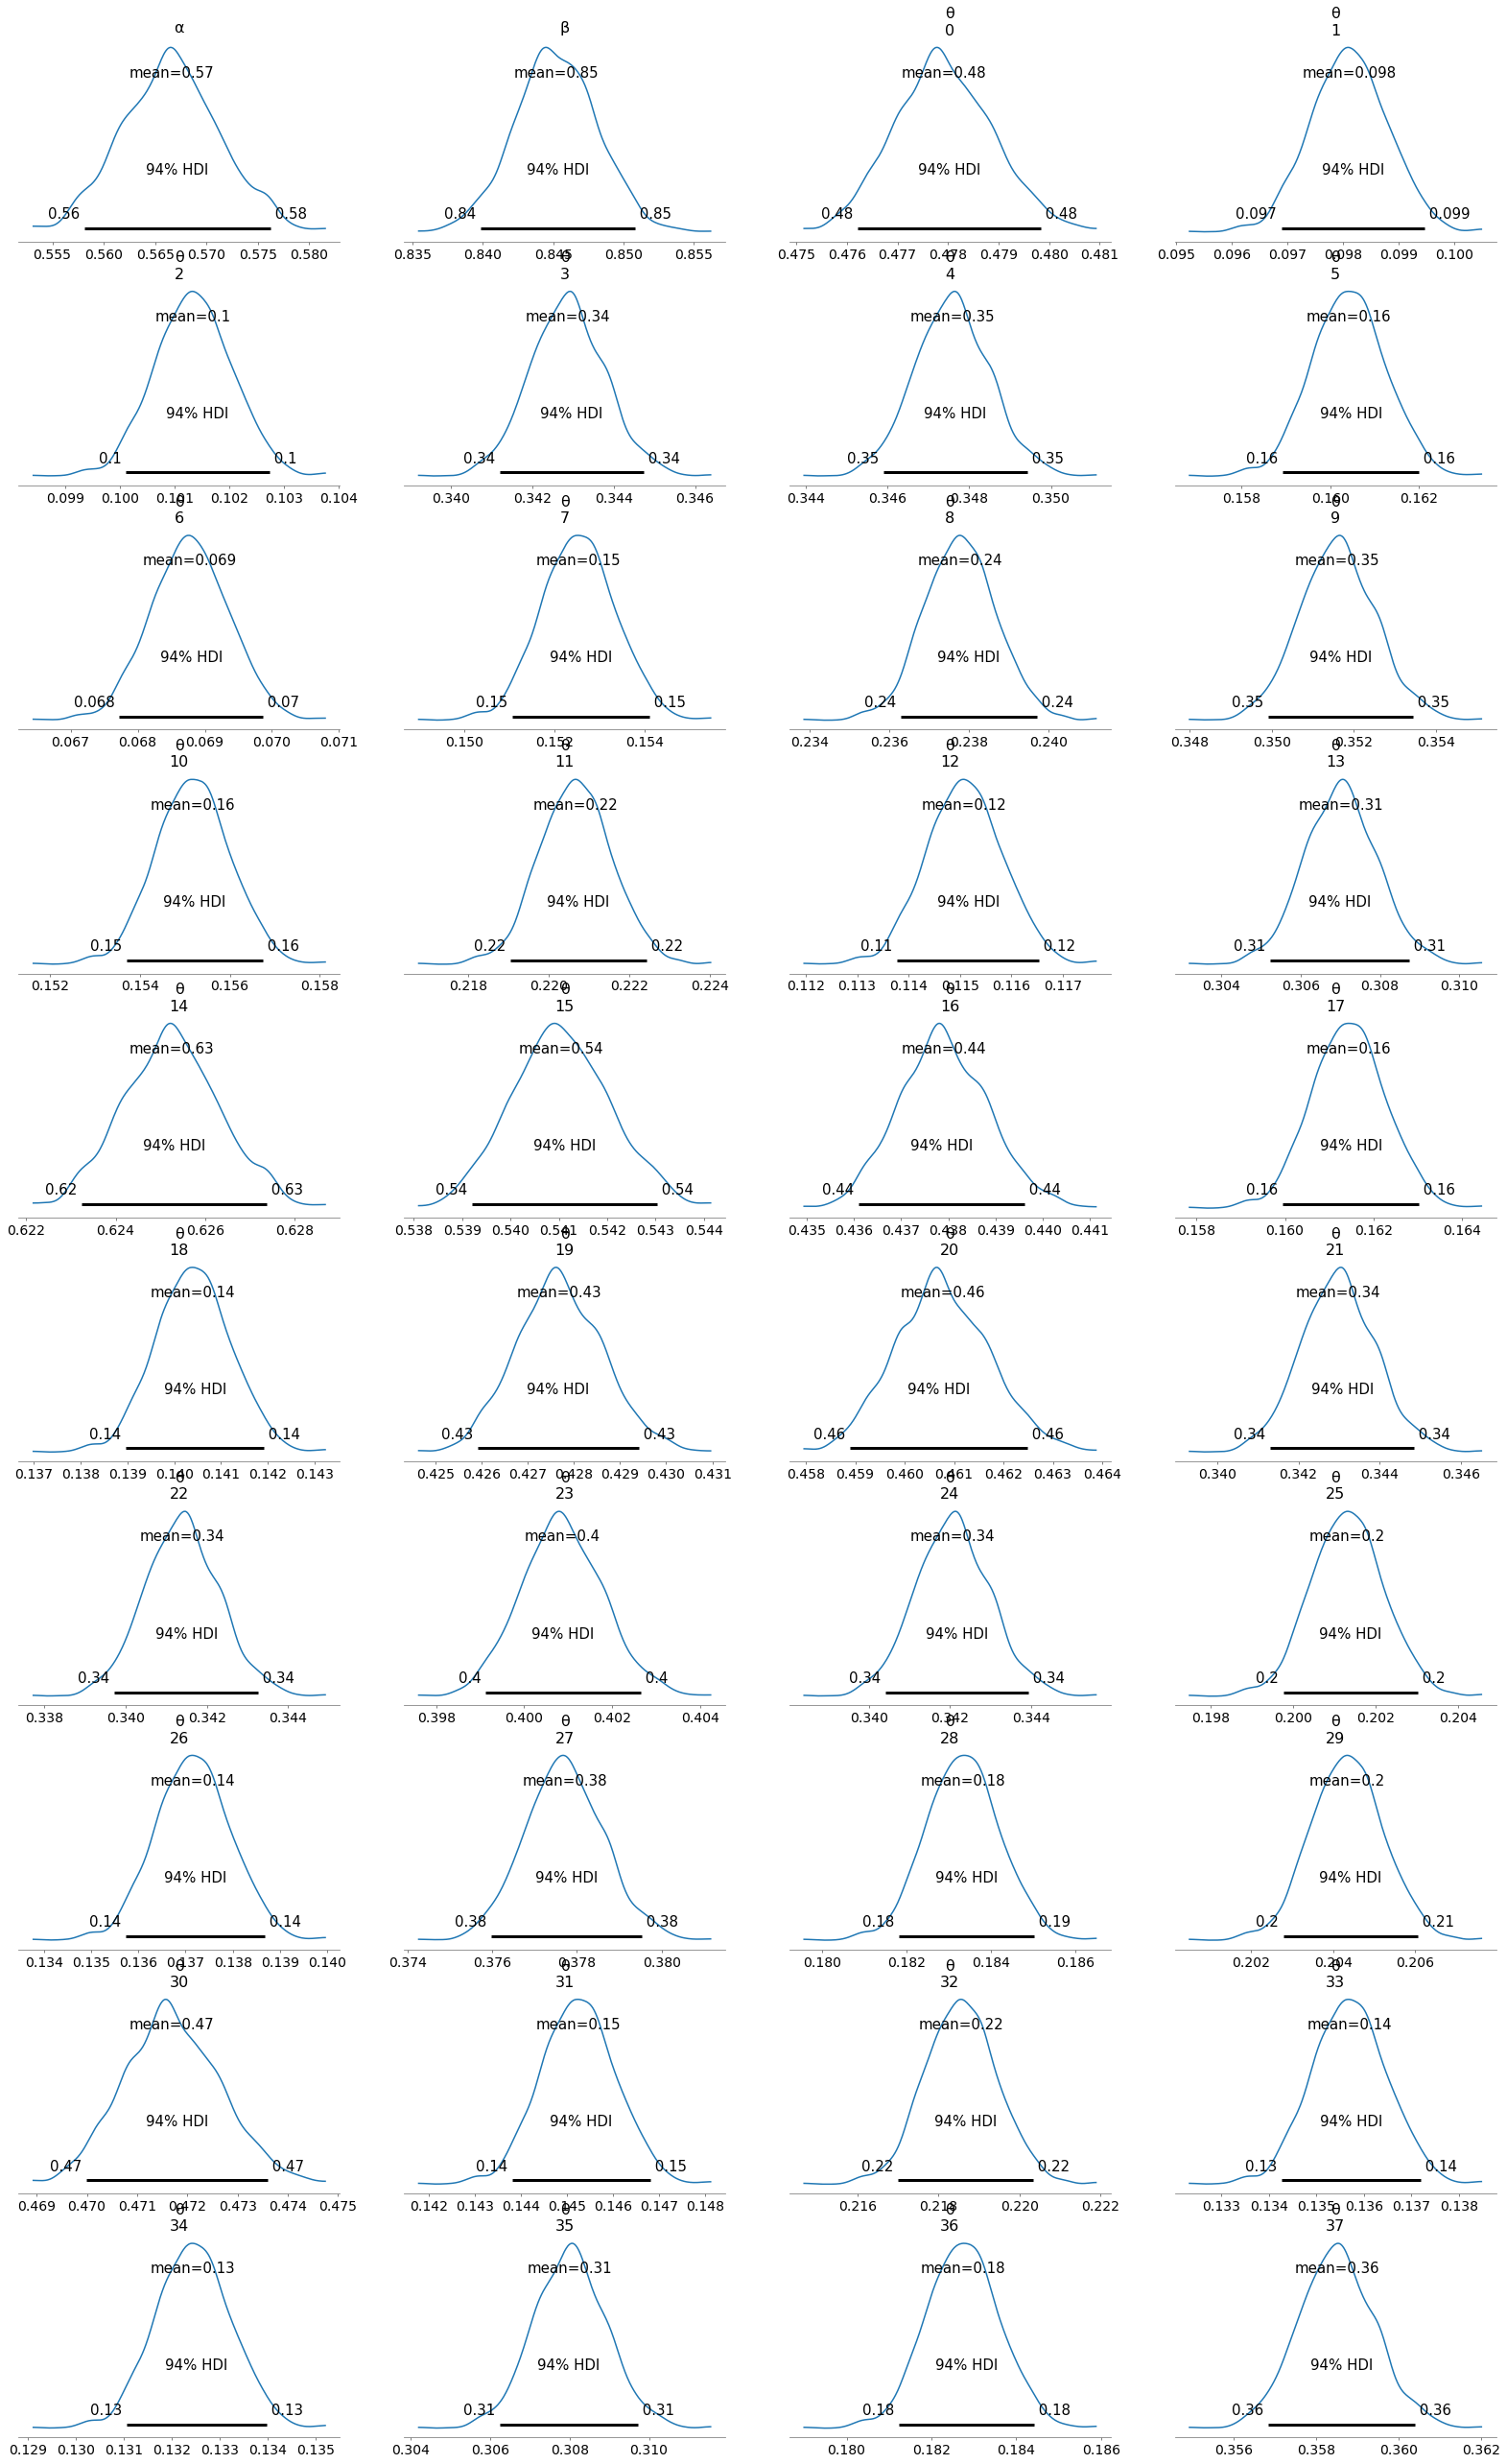

In [15]:
with model_simple:
    #pm.autocorrplot(burned_trace1)
    #az.plot_trace(b_trace_sim);
    az.plot_posterior(b_trace_sim);

In [17]:
X['V2'].mean()

1.8095026081807435

In [18]:
az.summary(b_trace_sim)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α          0.567  0.005   0.558    0.576        0.0      0.0     975.0   
β          0.845  0.003   0.840    0.851        0.0      0.0     997.0   
θ[0]       0.478  0.001   0.476    0.480        0.0      0.0    1226.0   
θ[1]       0.098  0.001   0.097    0.099        0.0      0.0    1239.0   
θ[2]       0.101  0.001   0.100    0.103        0.0      0.0    1243.0   
...          ...    ...     ...      ...        ...      ...       ...   
θ[426272]  0.677  0.001   0.675    0.679        0.0      0.0     946.0   
θ[426273]  0.738  0.001   0.736    0.740        0.0      0.0     919.0   
θ[426274]  0.927  0.001   0.926    0.928        0.0      0.0     913.0   
θ[426275]  0.178  0.001   0.177    0.180        0.0      0.0    1350.0   
bd        -0.670  0.005  -0.679   -0.662        0.0      0.0    1176.0   

           ess_tail  r_hat  
α            1068.0   1.01  
β            1168.0   1.00  
θ[0]         1250.0   1.00  
θ[1]         1416.0   1.00  
θ[2]         1412.0   1.00  
...             ...    ...  
θ[426272]    1005.0   1.01  
θ[426273]    1037.0   1.01  
θ[426274]    1002.0   1.00  
θ[426275]    1481.0   1.00  
bd           1222.0   1.00  

[426279 rows x 9 columns]

In [14]:
y_simple = y
x_n = 'AcceptedCmp5' 
x_0 = X['V4'].values
x_c = x_0 - x_0.mean()

with pm.Model() as model_v3:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    
    μ = α + pm.math.dot(x_c, β)    
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    
    y_1 = pm.Bernoulli('y_1', p=θ, observed=y_simple)

    step  = pm.NUTS()
    trace = pm.sample(1000, chains=2, step=step, progressbar=True)
    #burned_trace = trace[3000::]
    b_trace_v3 = az.from_pymc3(trace, log_likelihood=False)

Multiprocess sampling (2 chains in 4 jobs)
NUTS: [β, α]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 225 seconds.


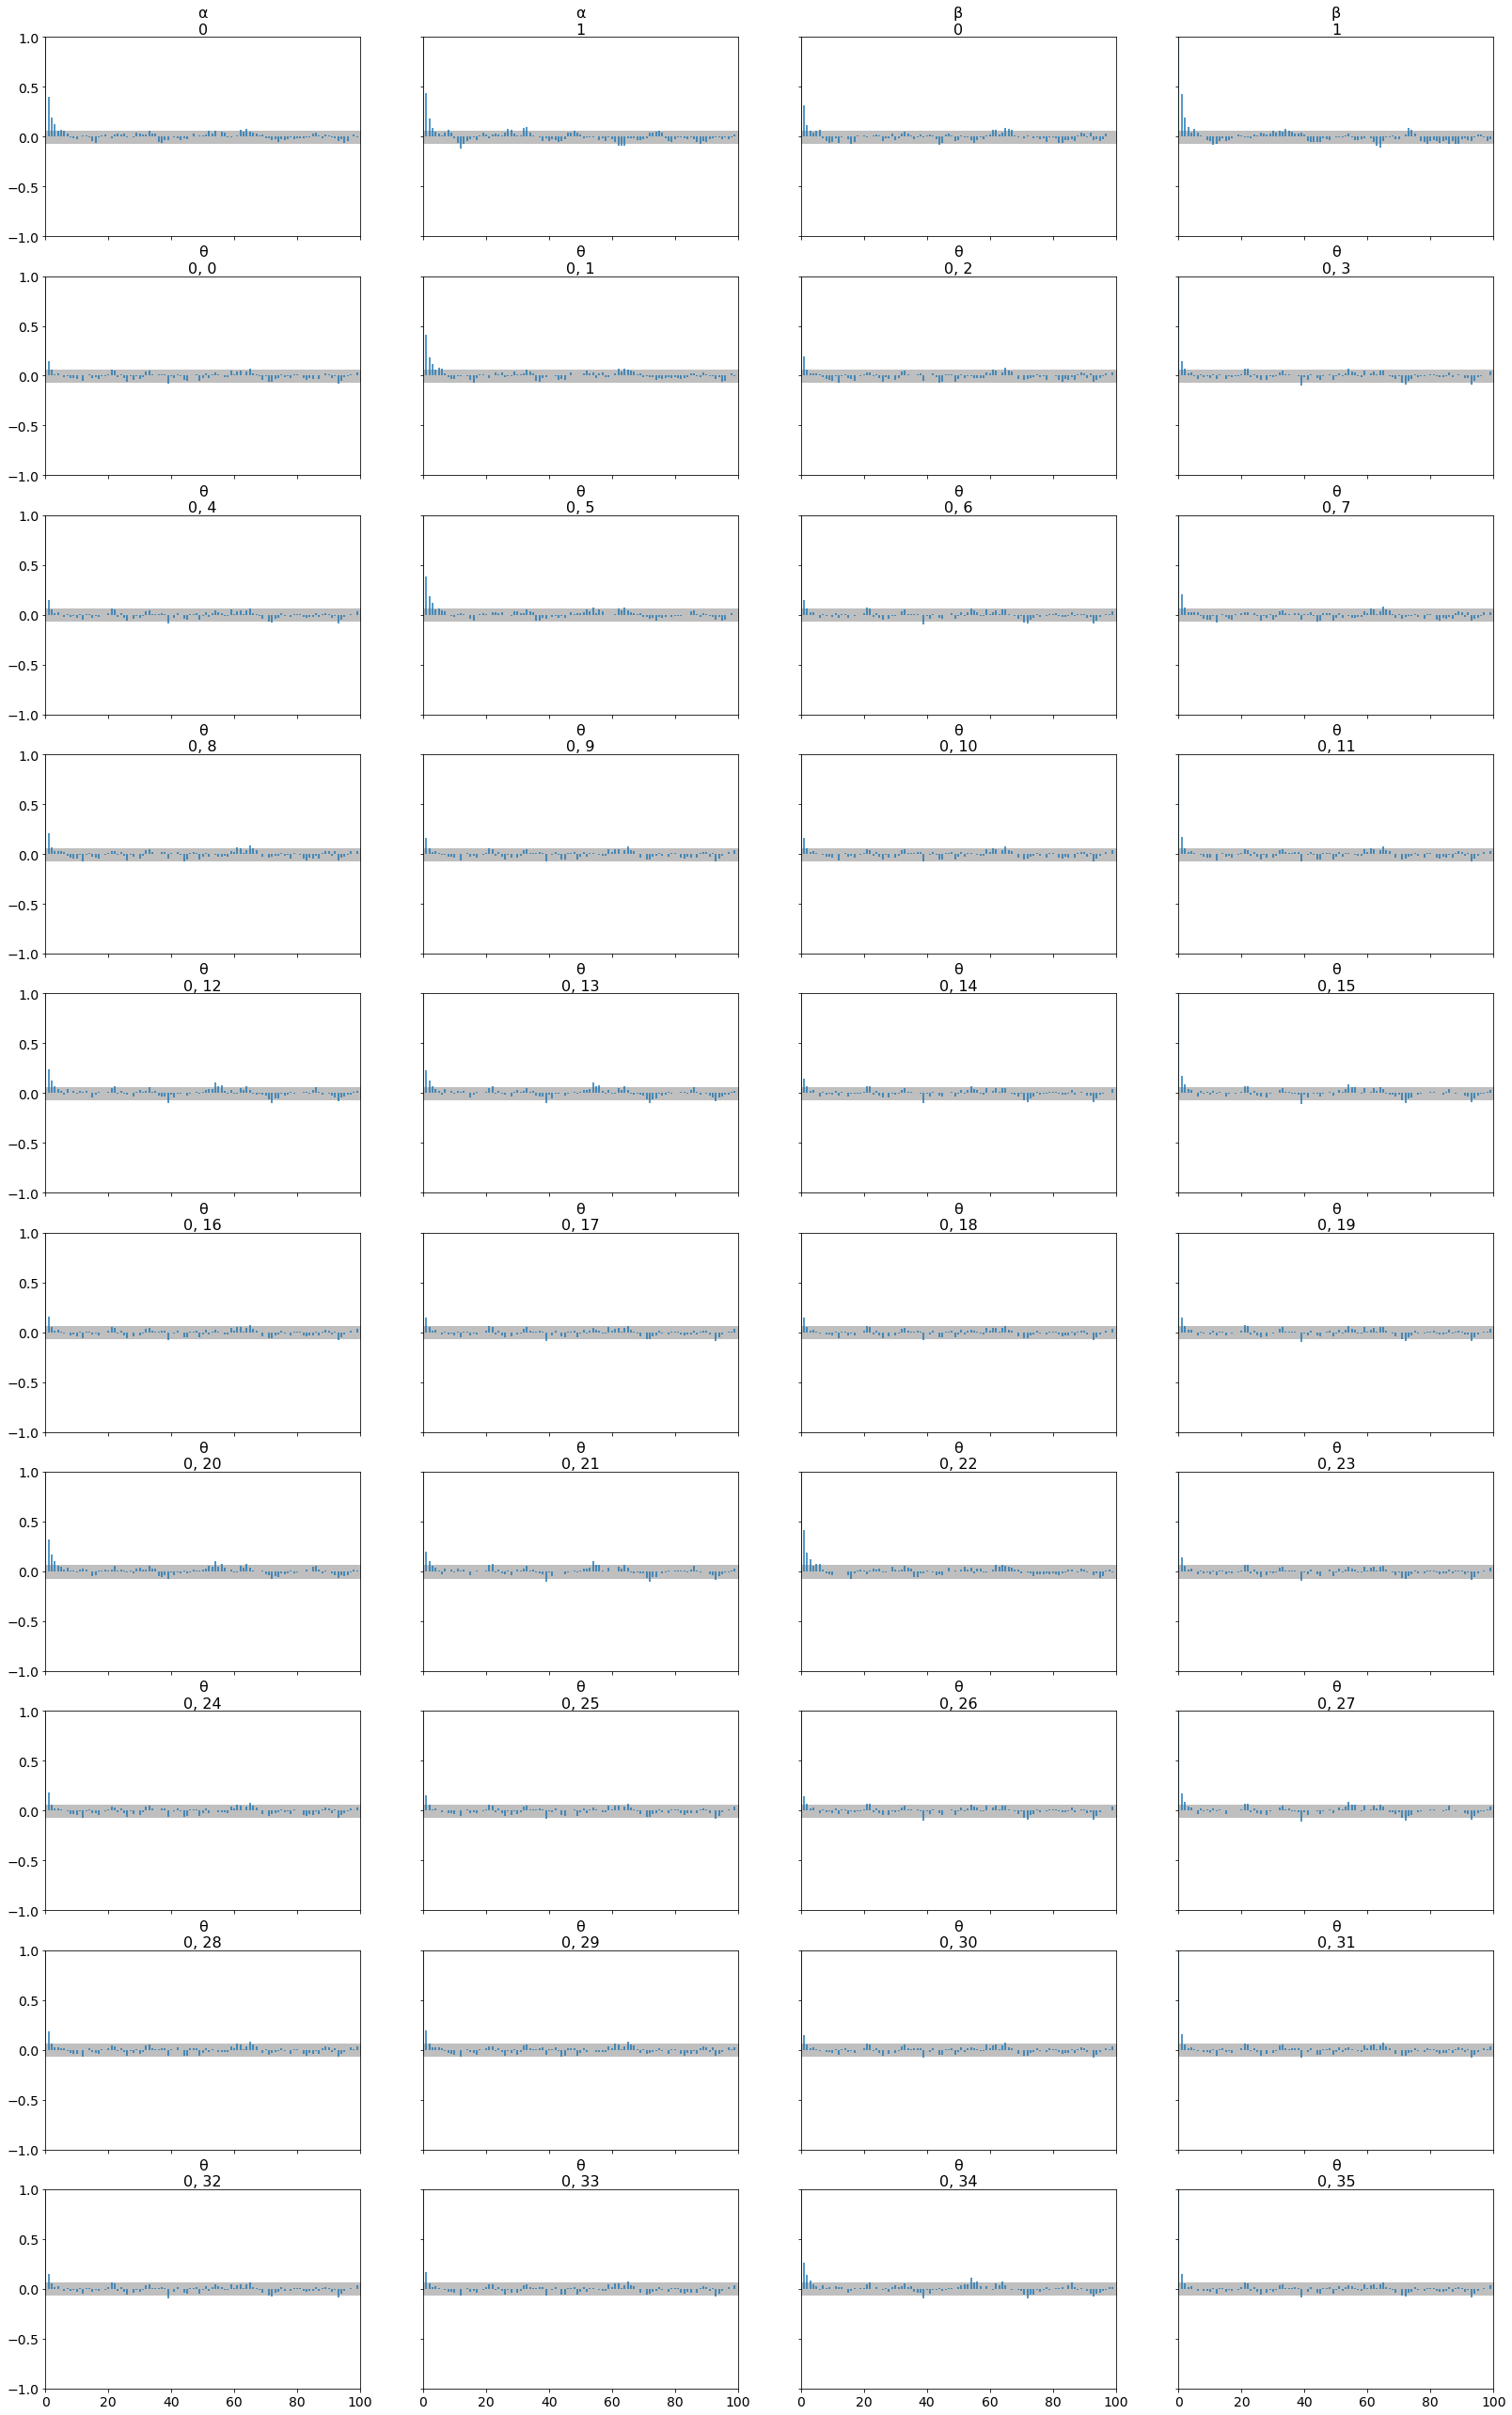

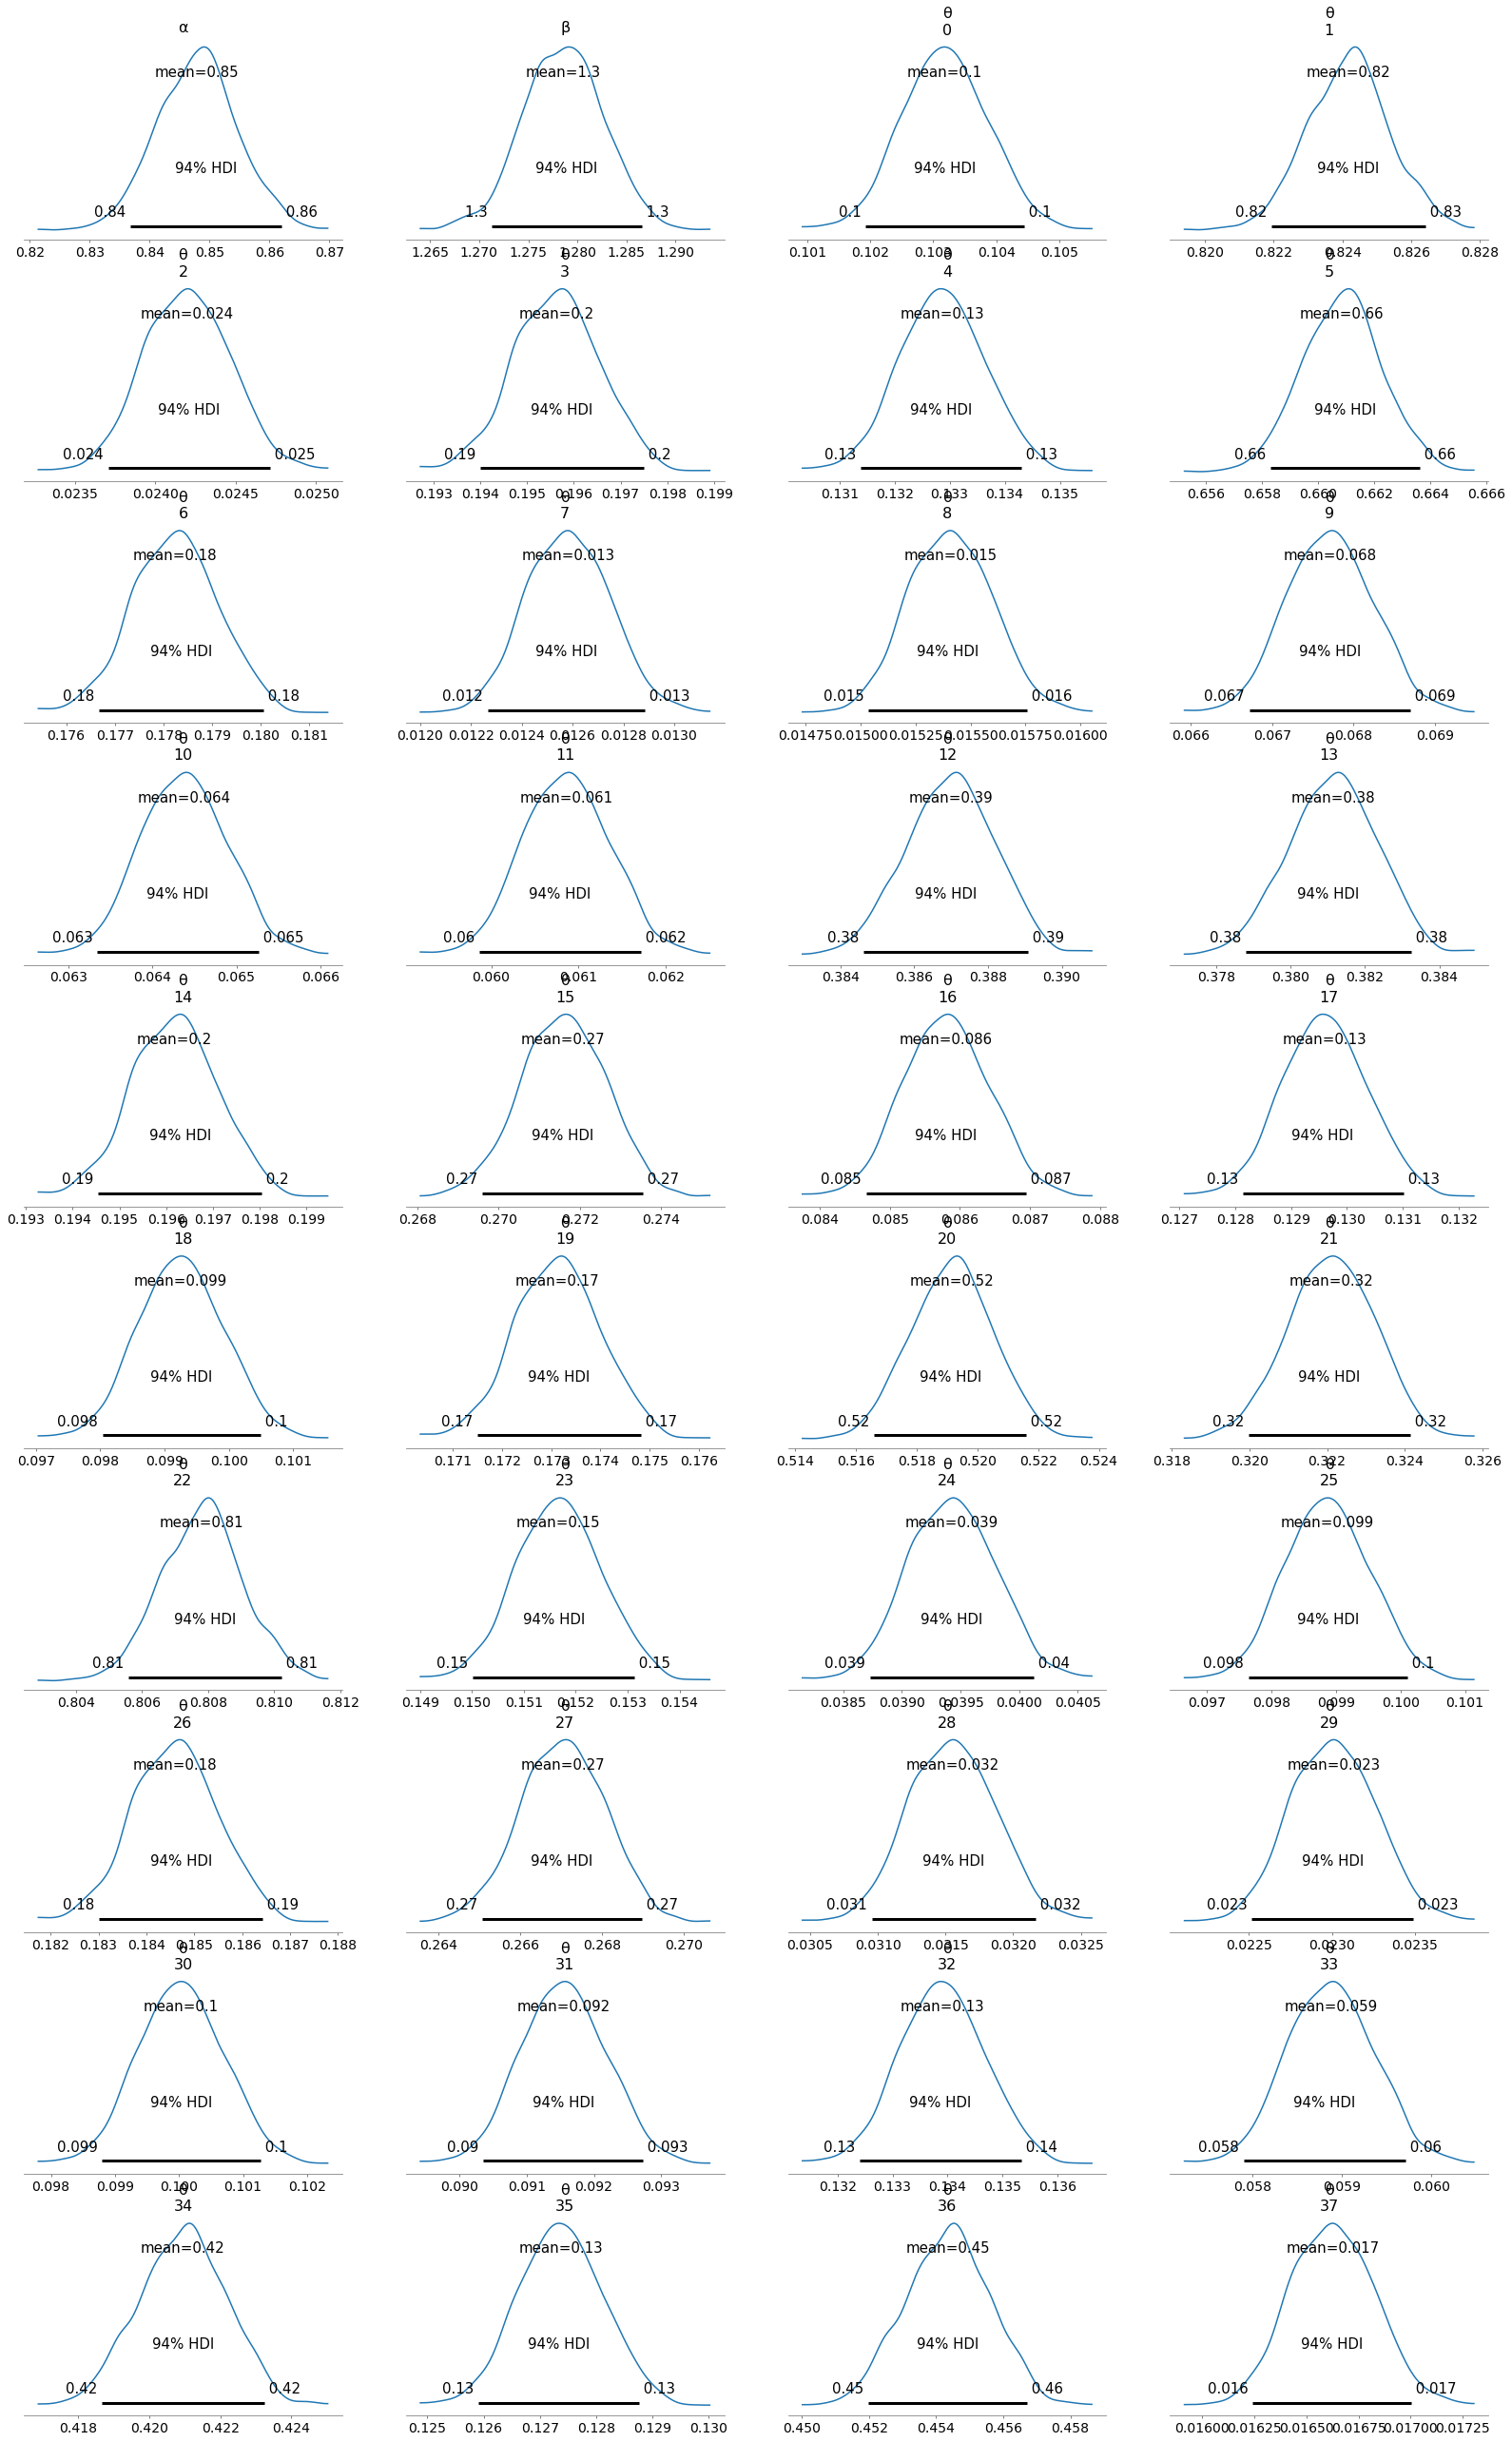

In [19]:
with model_v3:
    pm.autocorrplot(b_trace_v3)
    

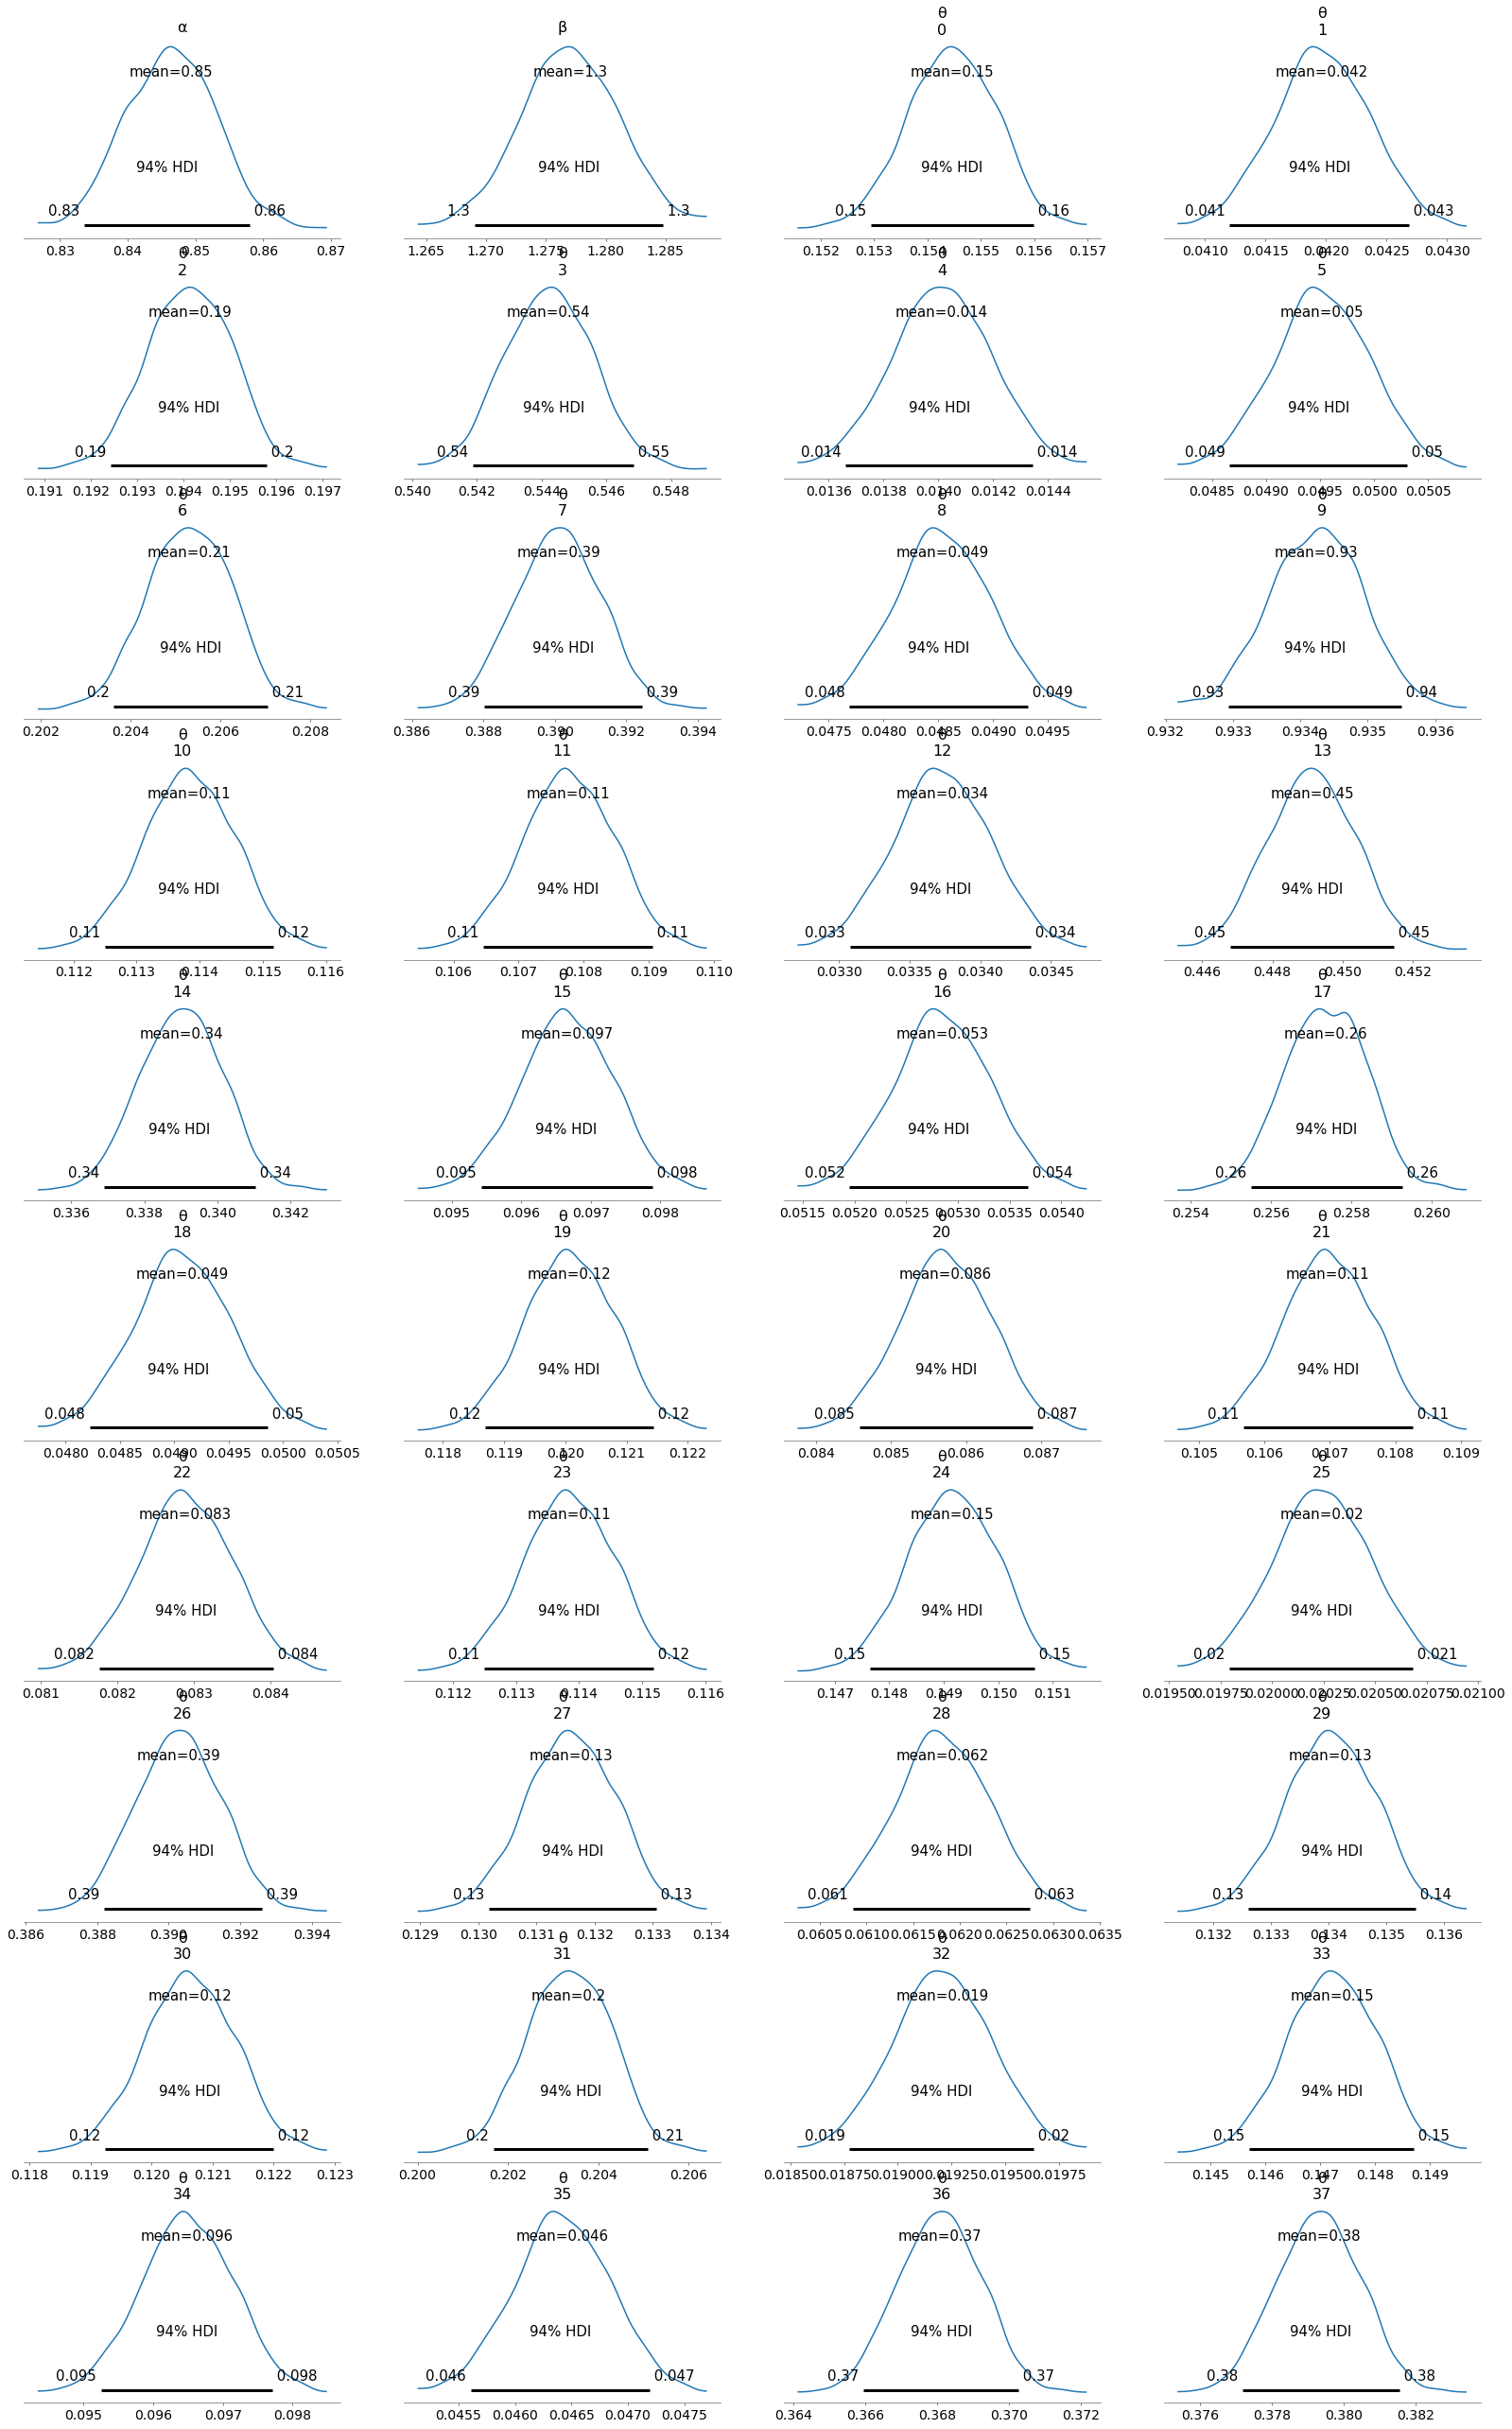

In [15]:
with model_v3:
    az.plot_posterior(b_trace_v3);

In [24]:
from scipy.stats import multivariate_normal

In [25]:
eps = 1e-12

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log(x):
    x = x.copy()
    x[x <= eps] = 0
    x[x > 0] = np.log(x[x > 0])  
    return x

def log_p_star(data, theta, s=100):
    y = np.array(data['Class'].tolist())
    p = sigmoid(np.dot(np.hstack((np.ones((len(data), 1)), 
                 data[['V1', 'V2']].to_numpy())), theta))
    return np.sum(y*log(p)+(1-y)*log(1-p)) \
           - np.dot(theta.T, theta)/2/s**2 - 3*np.log(s)

def mh(log_p_star, param_init, num_samples=5000, stepsize=1.0):
    
    theta = param_init
    samples = np.zeros((num_samples+1, param_init.shape[0]))
    samples[0] = theta
    for i in range(num_samples):
        theta_cand = multivariate_normal(mean=theta, 
                     cov=[stepsize**2]*len(theta)).rvs(size=1)
        ll_cand = log_p_star(theta_cand)
        ll_old = log_p_star(theta)
        if ll_cand > ll_old:
            theta = theta_cand
        else:
            u = np.random.uniform()
            if u < np.exp(ll_cand - ll_old):
                theta = theta_cand
        samples[i+1] = theta
    
    return samples

In [26]:
x=X['V1']

In [55]:
X['V1'].mean()


-2.1150725085124393

In [56]:
X['V2'].mean()



1.816297182032181

In [57]:
X['V3'].mean()


-3.450865436819576

In [58]:
X['V4'].mean()


2.281966214346028

In [59]:
X['V5'].mean()

-1.628061128437783

In [90]:
samples=mh(log_p_star=lambda x: log_p_star(RUSdata, x), \
                     param_init=np.random.rand(3), stepsize=0.1)

In [91]:
samples

array([[ 0.68745419,  0.68927168,  0.53731706],
       [ 0.66037281,  0.69713106,  0.63051232],
       [ 0.66037281,  0.69713106,  0.63051232],
       ...,
       [-1.06722712, -0.69120992,  0.69017308],
       [-1.06722712, -0.69120992,  0.69017308],
       [-1.06722712, -0.69120992,  0.69017308]])

In [92]:
with pm.Model() as logistic_model_v1:
     
    pm.glm.GLM.from_formula('Class ~ V1', data,
                            family=pm.glm.families.Binomial())
    step = pm.Metropolis()
    trace_v1 = pm.sample(1000, step=step, progressbar='True') 
 


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [V1]
>Metropolis: [Intercept]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 130 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [94]:
def graphss(trace):
    pm.traceplot(trace)
    az.plot_trace(trace)
    az.plot_posterior(trace)
    

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


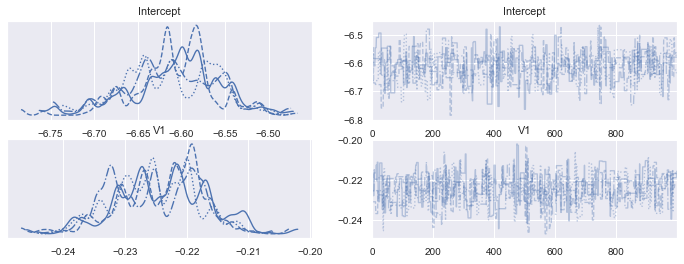

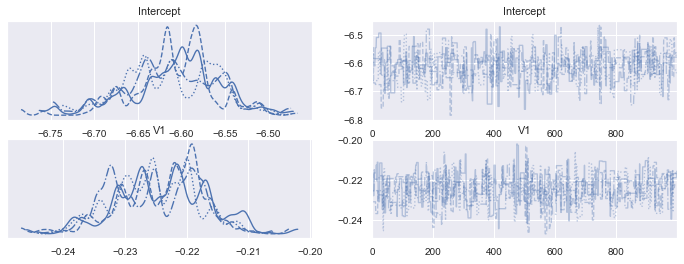

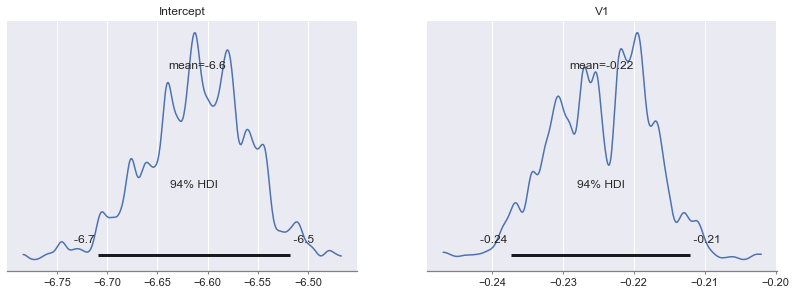

In [95]:
graphss(trace_v1)

In [14]:
with pm.Model() as logistic_model:
     
    pm.glm.GLM.from_formula('Class ~ V1 + V2', data,
                            family=pm.glm.families.Binomial())
    step = pm.Metropolis()
    trace = pm.sample(1000, step) 
 


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [V2]
>Metropolis: [V1]
>Metropolis: [Intercept]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 169 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V1'}>],
       [<AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V2'}>]], dtype=object)

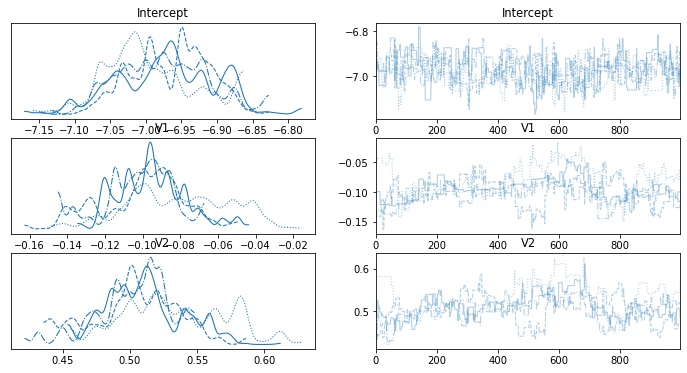

In [18]:
az.plot_trace(trace)

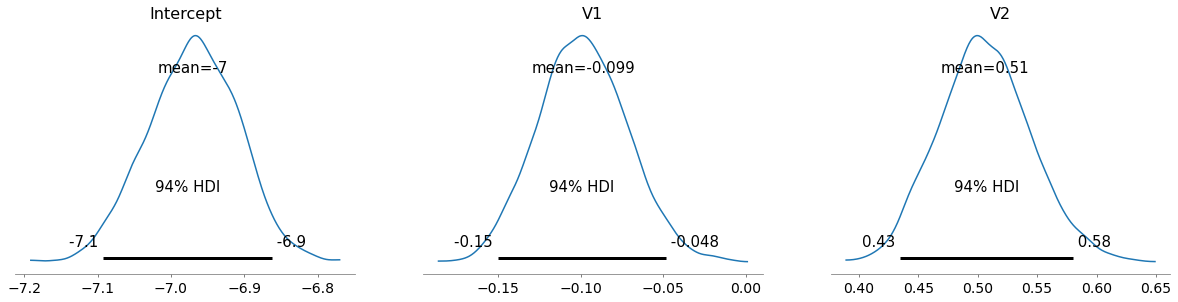

In [36]:
with logistic_model:
    az.plot_posterior(trace);

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V1'}>],
       [<AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V2'}>],
       [<AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V3'}>],
       [<AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V4'}>],
       [<AxesSubplot:title={'center':'V5'}>,
        <AxesSubplot:title={'center':'V5'}>]], dtype=object)

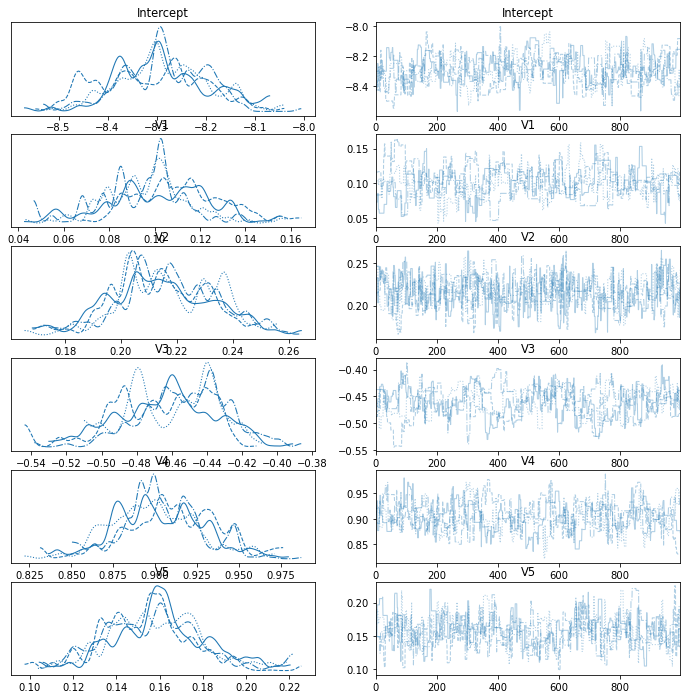

In [22]:
az.plot_trace(trace_linear)

In [34]:
with pm.Model() as logistic_model_nuts:
     
    pm.glm.GLM.from_formula('Class ~ V1 + V2', data,
                            family=pm.glm.families.Binomial())
    step = pm.NUTS()
    trace = pm.sample(1000, step) 
 

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [V2, V1, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 408 seconds.
The acceptance probability does not match the target. It is 0.9009834514456525, but should be close to 0.8. Try to increase the number of tuning steps.


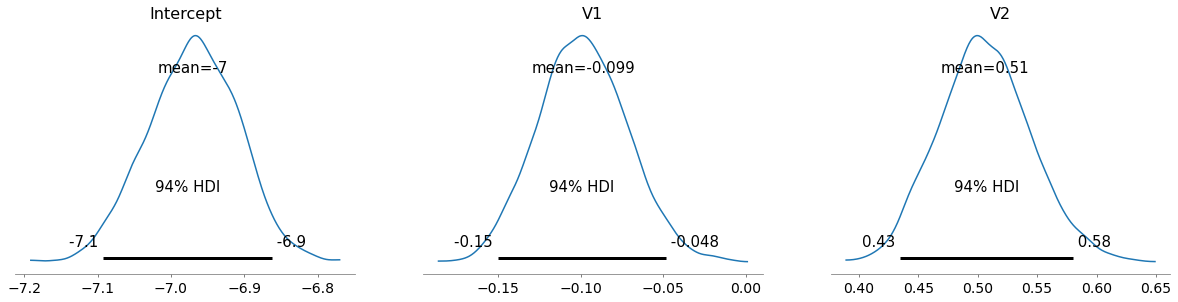

In [38]:
with logistic_model_nuts:
    az.plot_posterior(trace);
    

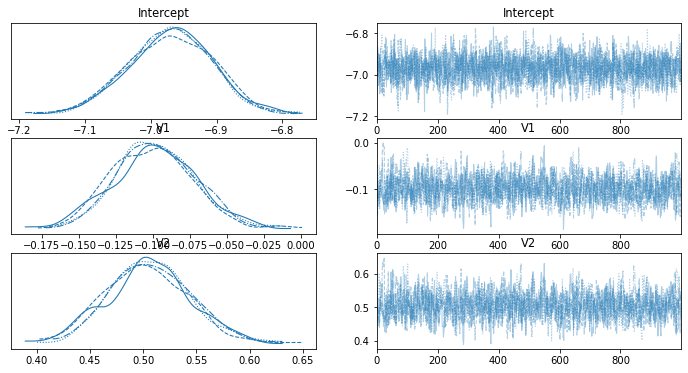

In [40]:
with logistic_model_nuts:
    az.plot_trace(trace)

Now taking 5 pca components.

In [117]:
with pm.Model() as logistic_model_all_mat:
     
    pm.glm.GLM.from_formula(
              'Class ~ V1 + V2 + V3 + V4 + V5', 
               data, family=pm.glm.families.Binomial())
    step = pm.Metropolis()
    trace__all_mat = pm.sample(1000, step, progressbar=True)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [V5]
>Metropolis: [V4]
>Metropolis: [V3]
>Metropolis: [V2]
>Metropolis: [V1]
>Metropolis: [Intercept]


/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/opt/anaconda3/lib/python3.9/site-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 301 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


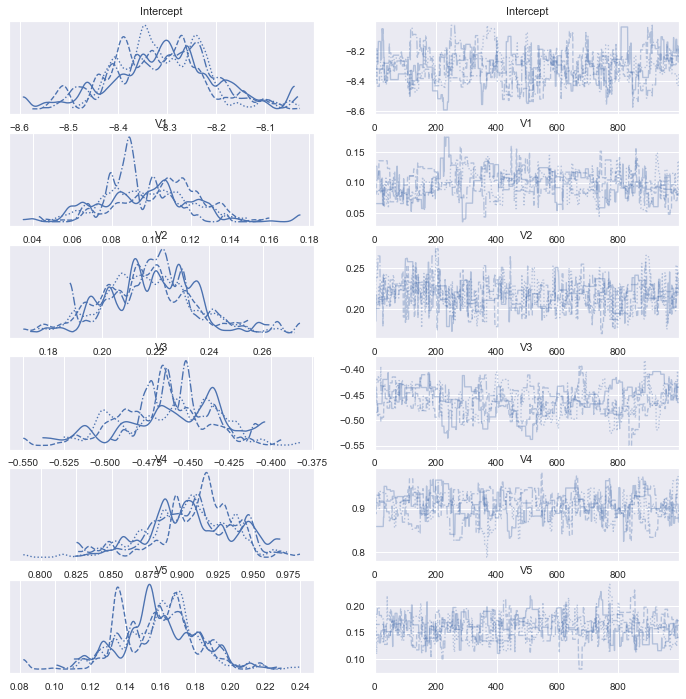

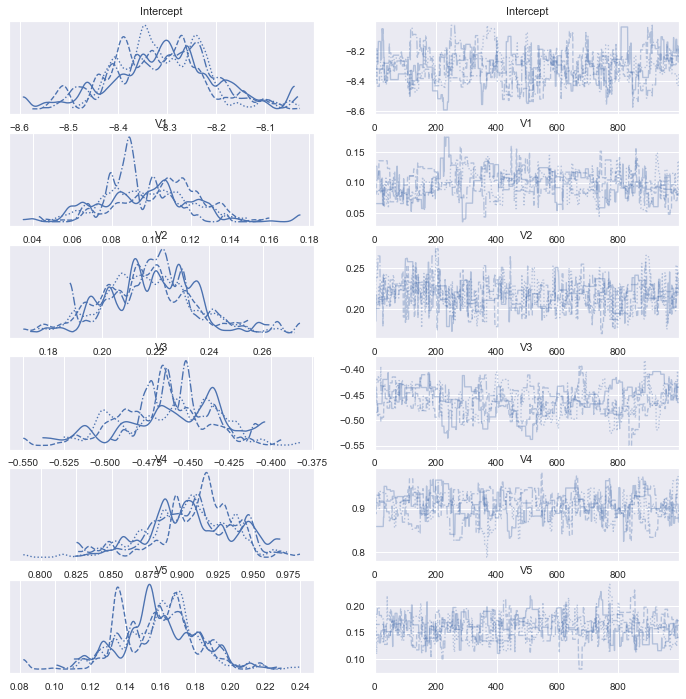

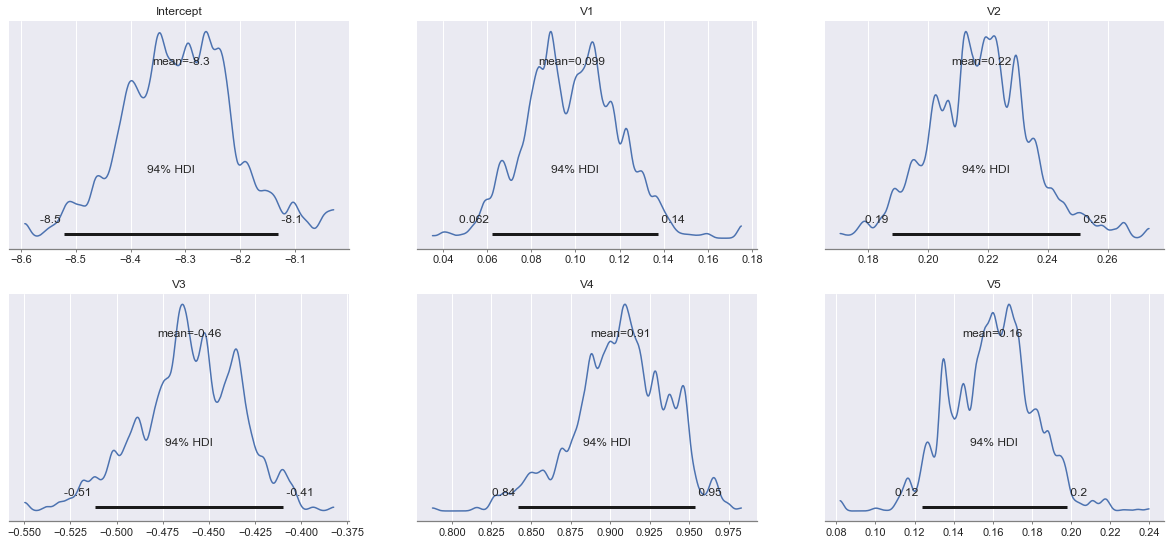

In [97]:
graphss(trace__all_mat)

In [142]:
ppc1 = pm.sample_posterior_predictive(trace__all_mat, model=logistic_model_all_mat, samples=1000)
predss = np.rint(ppc1['y'].mean(axis=0)).astype('int')

Confusion matrix
[[284004    311]
 [   313    179]]


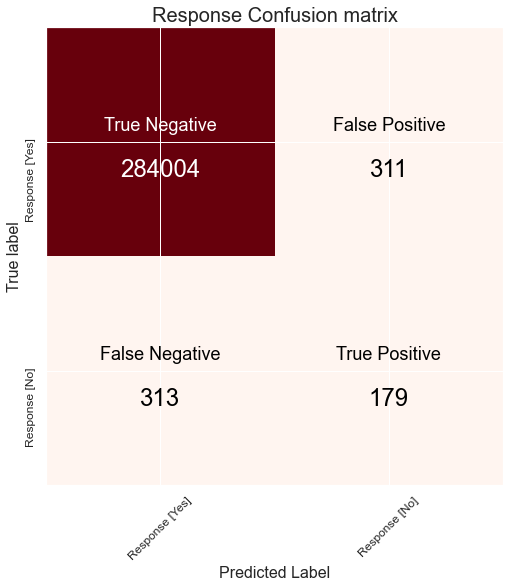

In [138]:
cm_mat = confusion_matrix(data['Class'], predss)
plot_confusion_matrix(cm_mat)

In [141]:
print('Accuracy of the full model: ', accuracy_score(predss, data['Class']))
print('f1 score of the full model: ', f1_score(predss, data['Class']))
print('Precision of the full model: ',precision_score(predss, data['Class'],pos_label=1, labels=[0,1])*100)
print('Recall of the full model: ',recall_score(predss, data['Class'],pos_label=1,labels=[0,1])*100)

Accuracy of the full model:  0.9986973634777235
f1 score of the full model:  0.470756062767475
Precision of the full model:  33.53658536585366
Recall of the full model:  78.94736842105263


In [143]:
pm.summary(trace__all_mat)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept -8.298  0.102  -8.464   -8.091      0.012    0.009      74.0   
V1         0.101  0.020   0.066    0.140      0.002    0.001     128.0   
V2         0.215  0.018   0.182    0.246      0.001    0.001     259.0   
V3        -0.462  0.029  -0.513   -0.407      0.005    0.003      39.0   
V4         0.906  0.030   0.854    0.966      0.004    0.003      60.0   
V5         0.159  0.022   0.116    0.196      0.002    0.001     109.0   

           ess_tail  r_hat  
Intercept      90.0   1.03  
V1            202.0   1.04  
V2            397.0   1.01  
V3            117.0   1.09  
V4             77.0   1.05  
V5            272.0   1.05

In [41]:
with pm.Model() as logistic_model_V1_nuts:
     
    pm.glm.GLM.from_formula(
              'Class ~ V1 + V2 + V3 + V4 + V5', 
               data, family=pm.glm.families.Binomial())
    step = pm.NUTS()
    trace_nuts = pm.sample(1000, step)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [V5, V4, V3, V2, V1, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 420 seconds.


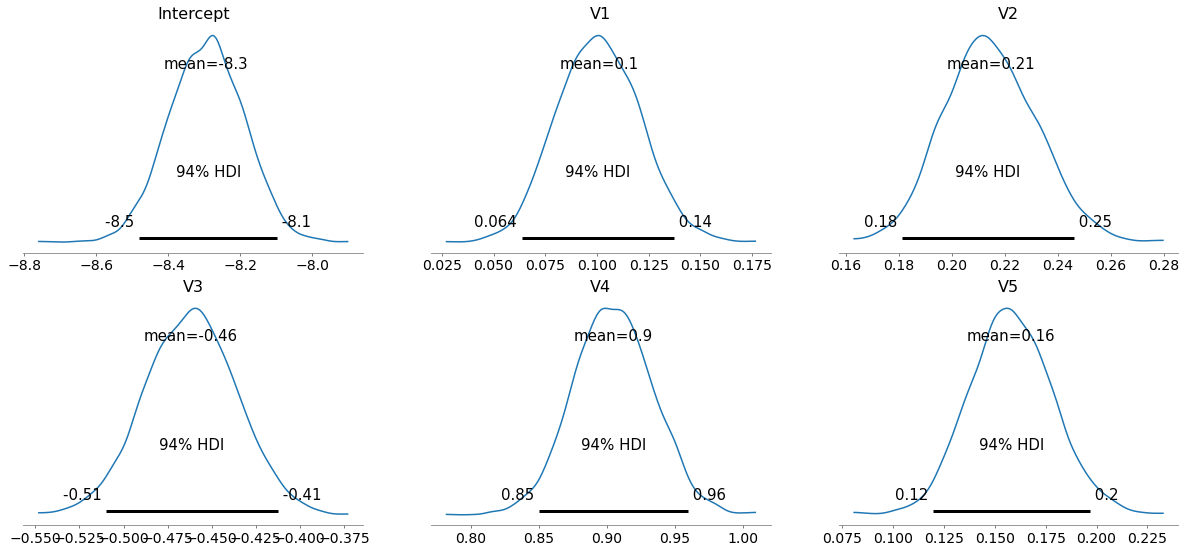

In [42]:
with logistic_model_V1_nuts:
    az.plot_posterior(trace_nuts);
    

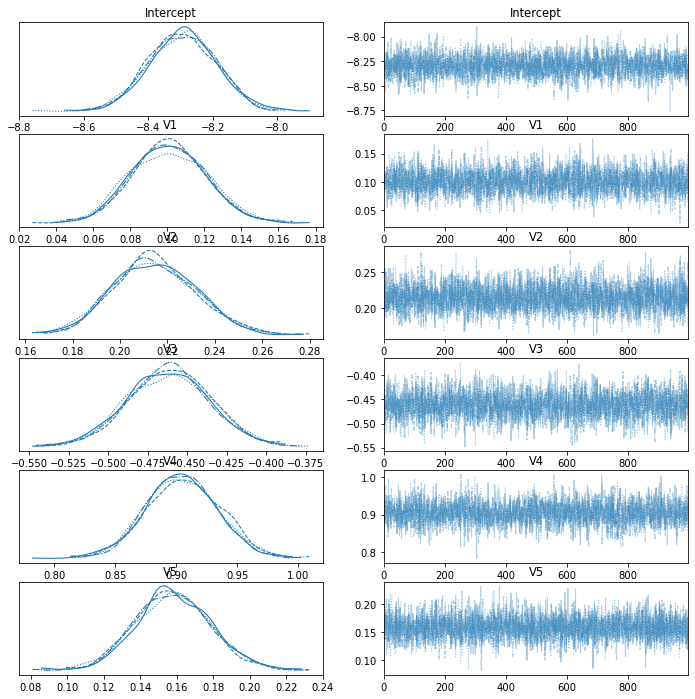

In [43]:
with logistic_model_V1_nuts:
    az.plot_trace(trace_nuts)

In [72]:
pm.summary(trace_nuts)

Got error No model on context stack. trying to find log_likelihood in translation.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept -8.294  0.104  -8.481   -8.096      0.002    0.001    2838.0   
V1         0.101  0.020   0.064    0.137      0.000    0.000    2878.0   
V2         0.215  0.017   0.181    0.246      0.000    0.000    3101.0   
V3        -0.462  0.026  -0.510   -0.413      0.000    0.000    2774.0   
V4         0.905  0.029   0.850    0.960      0.001    0.000    2850.0   
V5         0.158  0.021   0.120    0.197      0.000    0.000    3548.0   

           ess_tail  r_hat  
Intercept    2405.0    1.0  
V1           2712.0    1.0  
V2           2589.0    1.0  
V3           2662.0    1.0  
V4           2518.0    1.0  
V5           2890.0    1.0

In [120]:
ppc = pm.sample_posterior_predictive(trace_nuts, model=logistic_model_V1_nuts, samples=1000)
preds = np.rint(ppc['y'].mean(axis=0)).astype('int')

In [109]:
def plot_confusion_matrix(cm, classes = ['Response [Yes]', 'Response [No]'],
                          title='Response Confusion matrix',
                          cmap=plt.cm.Reds):
    
    # Display the matrix in text form
    print('Confusion matrix')
    print(cm)
    figsize(8, 8)
    
    # Show the matrix using the imshow functionality
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20)
    
    # Tick marks show classes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 12)
    plt.yticks(tick_marks, classes, rotation = 90, size = 12)

    # Formatting for text labels on plot
    fmt1 = 's'
    fmt2 = 'd'
    thresh = cm.max() / 2.
    
    # Four types of classifications
    types = [['True Negative', 'False Positive'],
             ['False Negative', 'True Positive']]
    
    # Add the actual numbers and the types onto the heatmap plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i - 0.05, format(types[i][j], fmt1),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")
        
        plt.text(j, i + 0.15, format(cm[i, j], fmt2),
                 horizontalalignment="center", size = 24,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size = 16)
    plt.xlabel('Predicted Label', size = 16)

Confusion matrix
[[284272     43]
 [   317    175]]


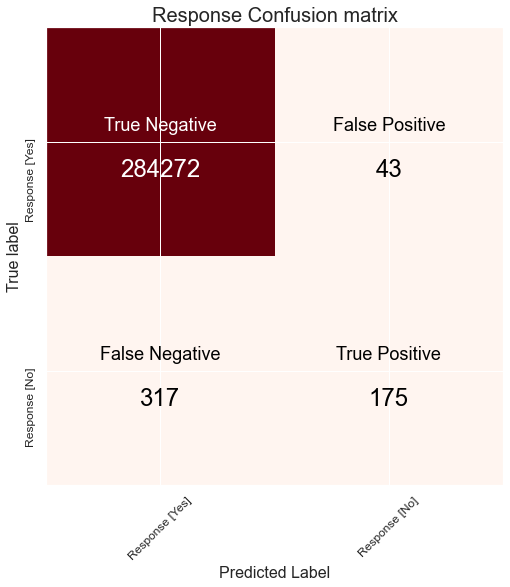

In [121]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from IPython.core.pylabtools import figsize
import itertools
cm = confusion_matrix(data['Class'], preds)
plot_confusion_matrix(cm)

In [122]:
print('Accuracy of the full model: ', accuracy_score(preds, data['Class']))
print('f1 score of the full model: ', f1_score(preds, data['Class']))
print('Precision of the full model: ',precision_score(preds, data['Class'],pos_label=1, labels=[0,1])*100)
print('Recall of the full model: ',recall_score(preds, data['Class'],pos_label=1,labels=[0,1])*100)

Accuracy of the full model:  0.9987359861239365
f1 score of the full model:  0.49295774647887325
Precision of the full model:  35.56910569105691
Recall of the full model:  80.27522935779817


By comparing all the model NUTS with Glm work good in all the scenario.

### COMPARING MCMC WITH TRADITIONAL MACHINE LEARNING ALGORITHMS.